# Subtask №3 | Test Task PA
##### _Pavlo Kukurik_

In [12]:
# Importing libs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import color_palette

In [13]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (30, 10)

### Reading Files

In [14]:
df = pd.read_csv('data/reading_data.csv')
df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30
...,...,...,...,...,...,...,...,...
523138,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26
523139,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58
523140,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62
523141,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53


In [15]:
summary_df = pd.read_csv('data/summary_info.csv')
summary_df

,topic,book_id
0,Health,012399fc36f74c489e4e
1,Health,01b85da7d21c478ab4b1
2,Health,0eef51fd8ce54d51bff6
3,Health,0efd511e57ea414ab5ab
4,Health,1251469de9ce40deace4
...,...,...
4340,Narrative Nonfiction,kf1lgMc5cwj6Oy4pY8qg
4341,Narrative Nonfiction,nfll6gVlKSMITW1bUCUH
4342,Narrative Nonfiction,rxFsAqLVPUcrZQi349P7
4343,Narrative Nonfiction,uF4C0V8faBoDaZvaKpar


### Short Data Overview

In [16]:
summary_df['topic'].value_counts()

topic
Self-Reflection       99
Daily Optimization    96
Entrepreneurship      95
Team Dynamics         93
Mindfulness           84
                      ..
Survival               8
Natural World          8
Decision-Making        8
Personal Stories       8
Intimacy               8
Name: count, Length: 166, dtype: int64

In [17]:
df['user_id'].value_counts()

user_id
###          1564
INVALID      1512
???          1506
null_id      1479
broken_id    1419
             ... 
UOKC0FOY        1
VYHS7GPC        1
1S30KW5O        1
7Q1ZRZPV        1
TU4EVXR7        1
Name: count, Length: 228319, dtype: int64

In [18]:
df.isna().sum()

Unnamed: 0                      0
user_id                         0
event_time                      0
country                         0
event_type                      0
event_properties_book_id        0
event_properties_format         0
user_properties_age         21359
dtype: int64

In [19]:
summary_df.isna().sum()

topic      0
book_id    0
dtype: int64

In [20]:
# df[df["event_properties_book_id"].str.match(r"^[a-zA-Z0-9]{20}$", na=False)]
df[~df["event_properties_book_id"].str.match(r"^[a-zA-Z0-9]{20}$", na=False)]

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
1837,1837,8ZZS3ZSS,2024-06-28 12:37:57,Germany,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,21
2344,2344,UJE53I3Y,2024-06-29 23:40:12,United Kingdom,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,59
10088,10088,9RZTJZ6T,2024-06-29 07:43:55,Australia,summary_start,9363ef58-bf72-4a32-b32c-39ff0540c3b8,audio,20
13499,13499,T3WJI567,2024-06-21 19:01:58,United States,summary_last_page,a254a694-2e66-4854-b8b6-85a735c95613,text,22
16309,16309,GHYKKHWN,2024-06-30 14:14:19,Chile,summary_start,8bb282f0-b6be-42e7-a741-c21cff2c9cbd,audio,error
...,...,...,...,...,...,...,...,...
512958,512958,Z1FEOYHY,2024-06-26 23:51:35,United States,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,33
517150,517150,L50FTHVJ,2024-06-29 17:23:48,South Africa,summary_last_page,8bb282f0-b6be-42e7-a741-c21cff2c9cbd,text,47
518930,518930,OO9G4ZS1,2024-06-27 13:26:33,United States,summary_last_page,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,32
521291,521291,FVJ4MRIG,2024-06-26 22:04:31,Netherlands,summary_start,b8987b7f-bff6-4cd1-953a-d952c33e9940,audio,52


After 2024-06-15 07:57:05, atypical values such as `a254a694-2e66-4854-b8b6-85a735c95613' began to appear in the data in the` `event_properties_book_id` column, relative to the usual `WUOlTHMd11KUsvKSMhPx`. But upon closer inspection, it seems to be completely `“clean”` data

### Cleaning the data and unite the datasets


In [21]:
df = df[df["user_id"] != "INVALID"]
df= df[df["user_id"].str.match(r"^[A-Za-z0-9]+$", na=False)]

df['user_id'].value_counts()

user_id
O608SMH5    117
PHS975R4     98
Y58F6GCD     95
OU037AKN     90
KTREUFV8     87
           ... 
VYHS7GPC      1
1S30KW5O      1
7Q1ZRZPV      1
TU4EVXR7      1
VRYAROZ7      1
Name: count, Length: 228314, dtype: int64

In [22]:
df.loc[:, "user_properties_age"] = pd.to_numeric(df["user_properties_age"], errors='coerce')
df = df[df["user_properties_age"].notna()]

df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0
...,...,...,...,...,...,...,...,...
523138,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0
523139,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0
523140,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0
523141,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0


In [23]:
# Drop duplicates (when same user make several events at the same time: 155 cases)
df = df.drop_duplicates(subset=["user_id", "event_time"], keep="first").copy()
df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0
...,...,...,...,...,...,...,...,...
523138,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0
523139,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0
523140,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0
523141,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0


In [25]:
summary_df = summary_df.drop_duplicates(subset="book_id", keep="first").copy()

merged_df = df.merge(summary_df, left_on="event_properties_book_id", right_on="book_id", how="left")
merged_df["topic"] = merged_df["topic"].fillna("Unknown")
merged_df = merged_df.drop(columns=["book_id"])


merged_df

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0,Education
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity
...,...,...,...,...,...,...,...,...,...
489628,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition
489629,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0,Daily Optimization
489630,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0,Mind Enhancement
489631,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0,Financial Management


In [26]:
unknown_books = merged_df[merged_df["topic"] == "Unknown"]
unknown_books['user_properties_age'].value_counts()

user_properties_age
63.0    1439
21.0    1429
33.0    1416
67.0    1407
48.0    1406
59.0    1402
64.0    1401
53.0    1397
38.0    1393
40.0    1393
24.0    1392
25.0    1390
34.0    1383
26.0    1383
46.0    1382
52.0    1380
42.0    1380
66.0    1379
36.0    1377
65.0    1372
54.0    1371
27.0    1371
49.0    1371
50.0    1369
51.0    1368
29.0    1368
18.0    1363
61.0    1363
47.0    1355
35.0    1353
41.0    1352
37.0    1349
20.0    1348
19.0    1347
22.0    1342
43.0    1340
23.0    1339
56.0    1338
45.0    1335
62.0    1333
55.0    1328
39.0    1328
60.0    1324
31.0    1324
32.0    1322
44.0    1321
30.0    1318
58.0    1318
57.0    1306
28.0    1296
Name: count, dtype: int64

### Functions

In [91]:
def age_distribution(df_name: pd.DataFrame, unique=False) -> plt.Figure():
    """
    This function plots the age distribution by users id.
    :param unique:
    :param df_name:
    :return:
    """

    if unique:
        sns.histplot(df_name.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color='crimson')
        plt.xlabel("Вік користувача")
        plt.ylabel("Кількість унікальних користувачів")
        plt.title("Розподіл віку унікальних користувачів")
        plt.show()

    else:
        sns.histplot(df_name["user_properties_age"],bins=50, color='crimson')
        plt.xlabel("Вік користувача")
        plt.ylabel("Кількість читачів")
        plt.title("Розподіл віку користувачів (Активнсть користувачів за віком)")
        plt.show()

### EDA

In [35]:
df_cleaned = merged_df.copy()
df_cleaned

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic
0,0,LM49ELXC,2024-06-02 04:25:35,United States,summary_last_page,0dbe62f1ca984daf881a,text,32.0,Education
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity
...,...,...,...,...,...,...,...,...,...
489628,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition
489629,523139,FW8ABA1L,2024-04-25 19:03:06,Australia,summary_start,bda5b563f50e42baa79f,audio,58.0,Daily Optimization
489630,523140,PP8XF2GE,2024-05-09 03:23:11,Spain,summary_start,fe3987fe5ba74503a0b5,audio,62.0,Mind Enhancement
489631,523141,C1TVK5ZU,2024-04-11 22:53:28,United States,summary_start,eXQgxTaSYSKnsywOc3RI,text,53.0,Financial Management


In [87]:
print(f"The number of unique users is: {df_cleaned['user_id'].nunique()}. This is the {df_cleaned['user_id'].nunique() / df_cleaned.__len__():.3}% of the data set.")
print('--------------------------------------------------------------------------')
print(f"The number of unique books is: {df_cleaned['event_properties_book_id'].nunique()}")


The number of unique users is: 221655. This is the 0.453% of the data set.
--------------------------------------------------------------------------
The number of unique books is: 1652


In [89]:
user_event_counts = df_cleaned.groupby("user_id")["event_time"].nunique()
single_event_users = user_event_counts[user_event_counts == 1]
total_users = len(user_event_counts)
percentage = len(single_event_users) / total_users * 100

print(f"Number of users with only one unique event: {len(single_event_users)}")
print(f"Percent of such users: {percentage:.2f}% (Between unique users)")

Number of users with only one unique event: 127200
Percent of such users: 57.39% (Between unique users)


#### The plot twist (Spliting th data)

###### Activity of users by age and users age distribution

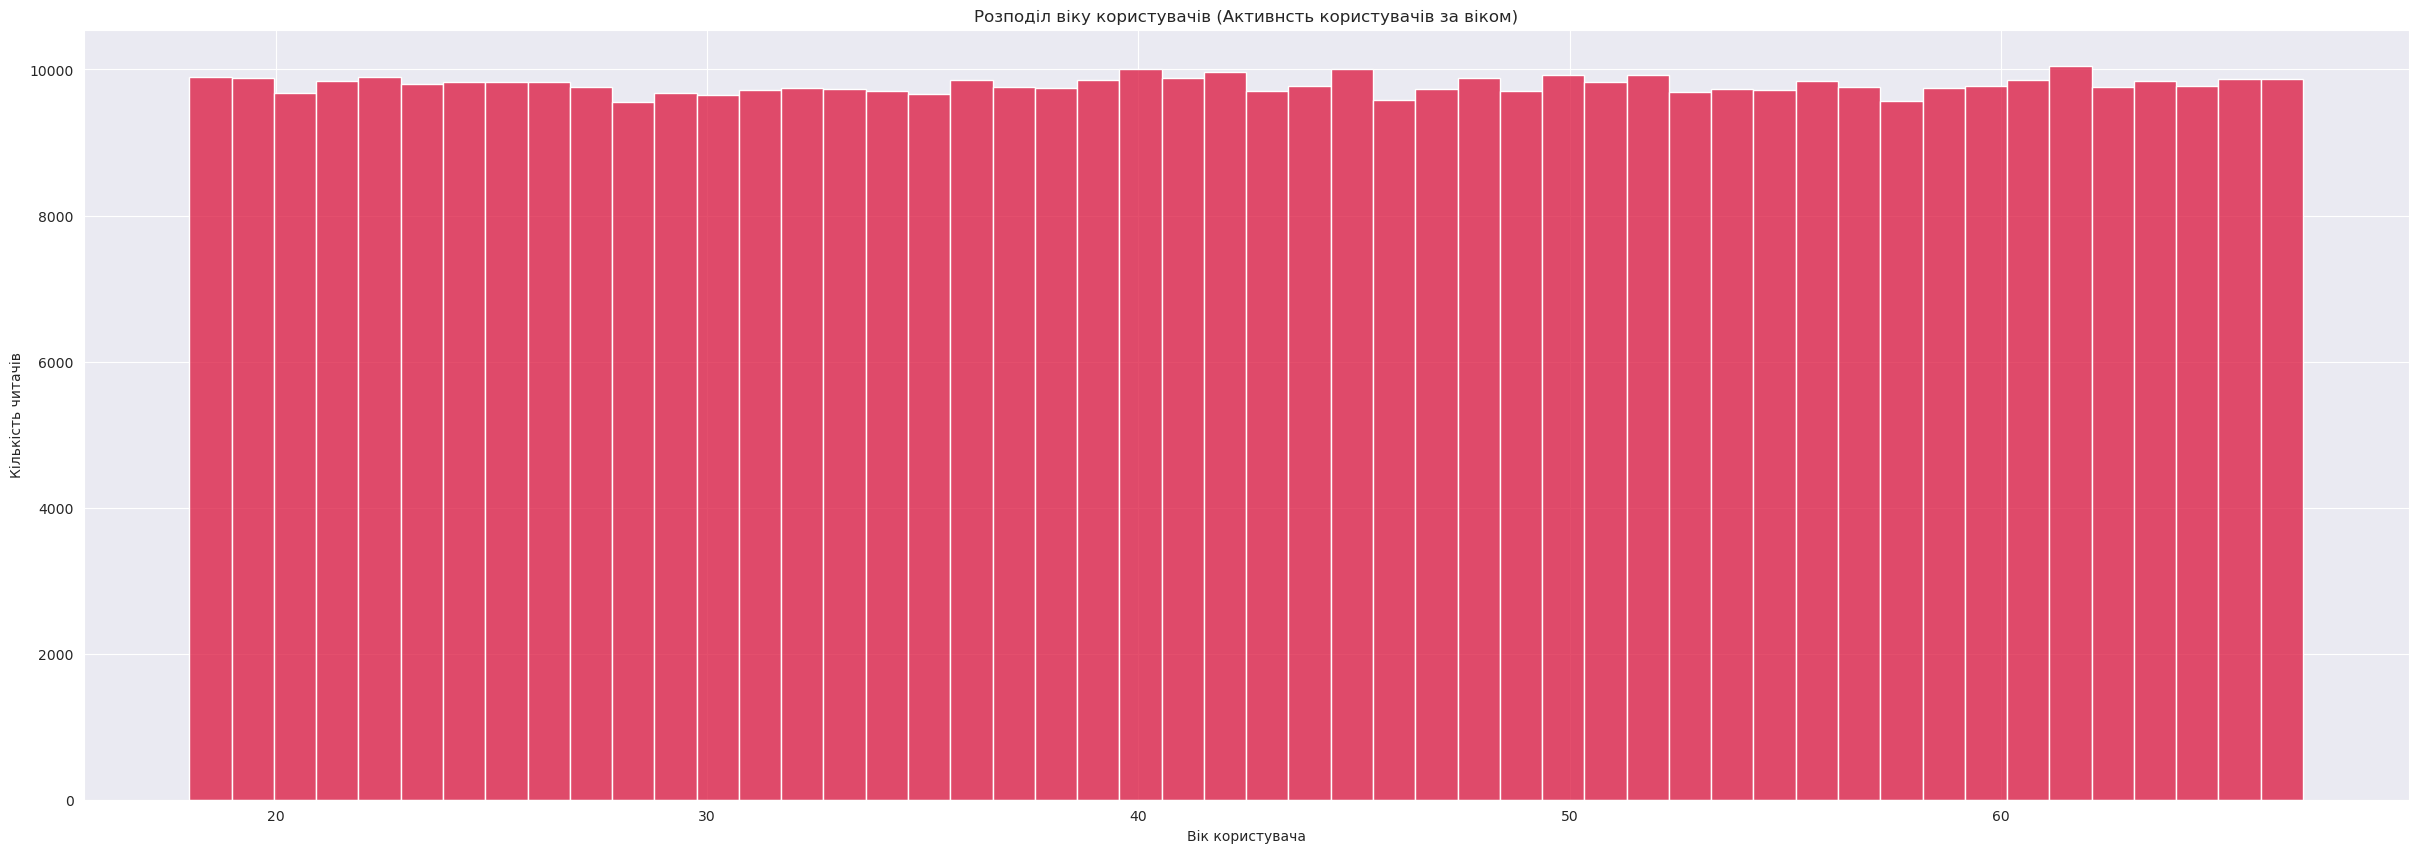

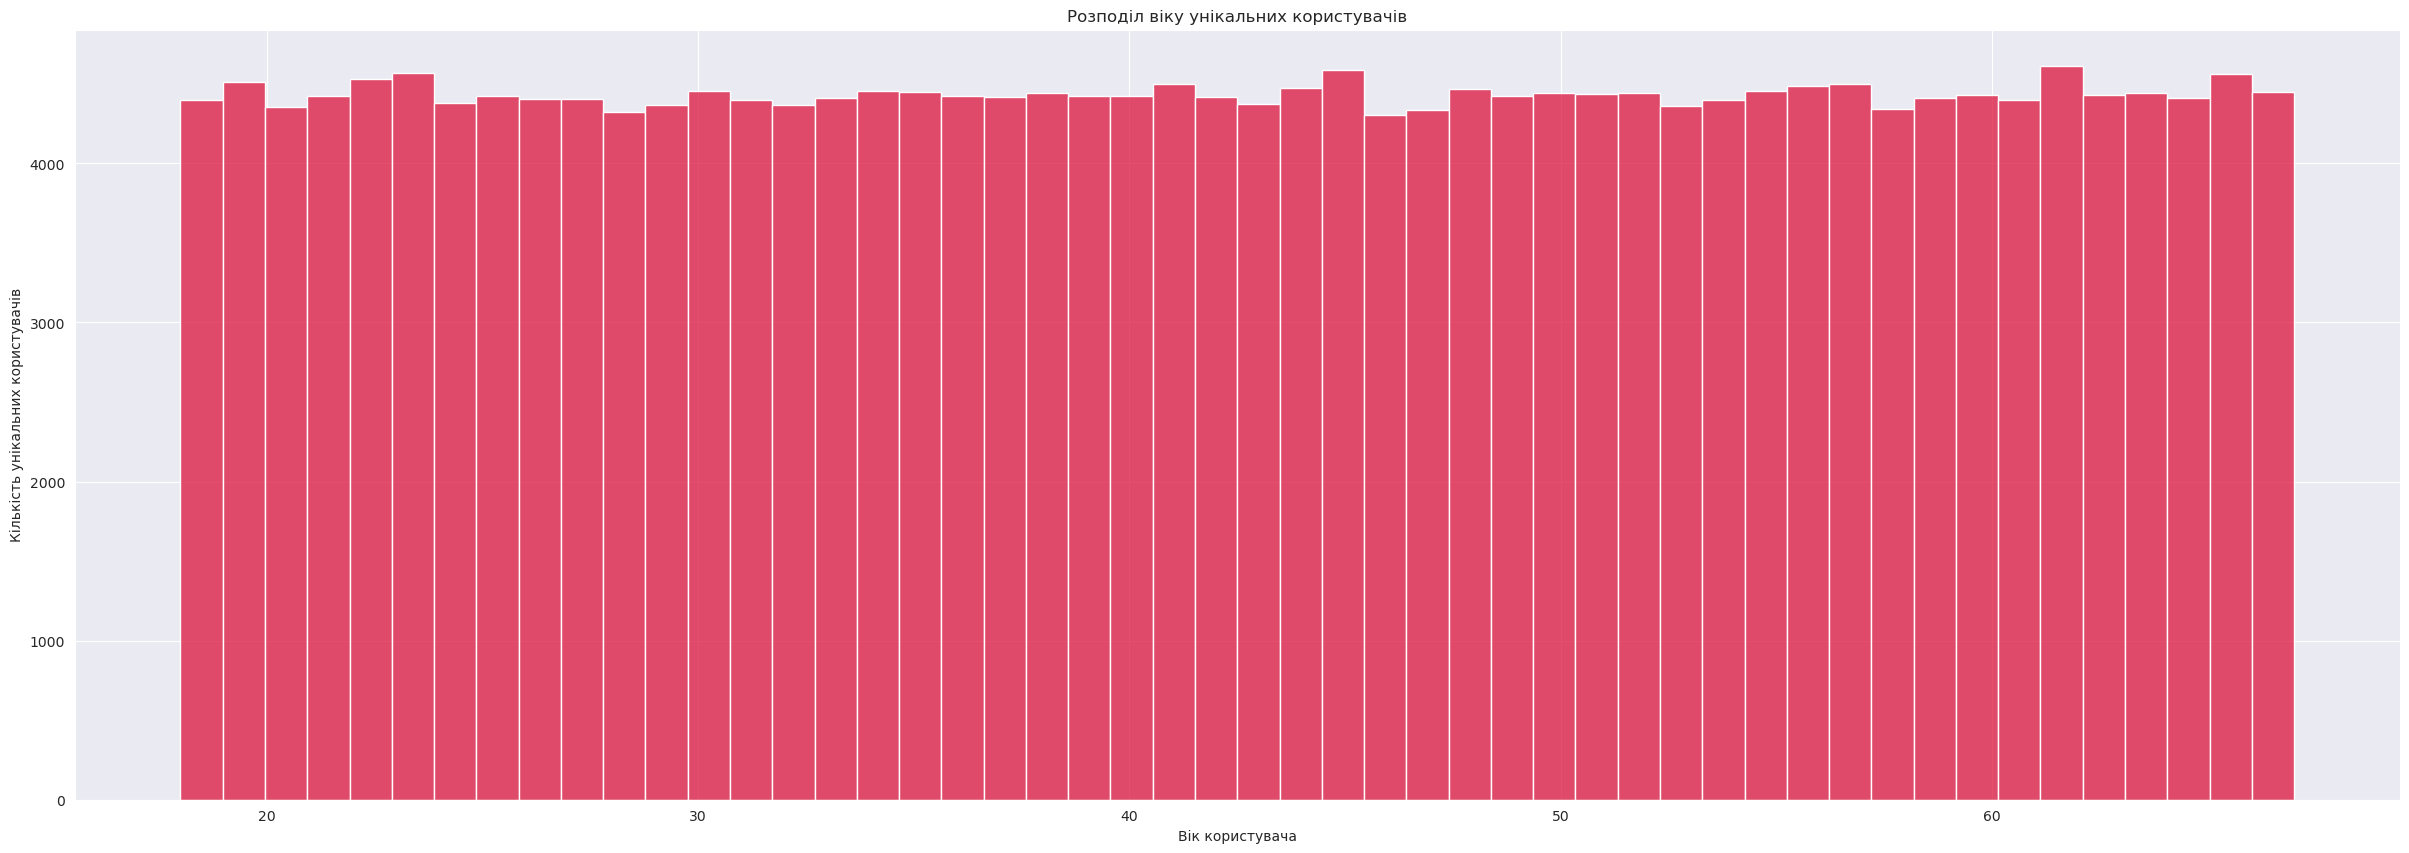

In [92]:
age_distribution(df_cleaned)
age_distribution(df_cleaned, unique=True)

Here we see that the  looks uniform, which is quite surprising. Let`s look closer


In [118]:
df_copy = df_cleaned.copy()
df_copy["previous_age"] = df_copy.groupby("user_id")["user_properties_age"].shift(1)
users_with_age_changes = df_copy[df_copy["user_properties_age"] != df_copy["previous_age"]].dropna()
users_with_changes_ids = users_with_age_changes["user_id"].unique()
users_with_age_changes = df_copy[df_copy["user_id"].isin(users_with_changes_ids)]
users_without_age_changes = df_copy[~df_copy["user_id"].isin(users_with_changes_ids)]

users_with_age_changes

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic,previous_age
1,1,7XTQHMH8,2024-06-03 21:46:51,Spain,summary_start,WUOlTHMd11KUsvKSMhPx,audio,43.0,Unknown,NaN
2,2,2IB2IK8U,2024-05-17 18:47:01,United States,summary_start,AJfjqmnZfcGYTpDtYhzz,audio,57.0,Entrepreneurship,NaN
3,3,O9C6WXJE,2024-06-07 01:18:14,United States,summary_start,1384d32a0cc5415ba60b,audio,45.0,Brain Science,NaN
4,4,4GRWXHNP,2024-05-03 13:16:34,Hong Kong,summary_last_page,1Z9KhNI1CyXJMDXEDdgN,audio,30.0,Creativity,NaN
6,6,8Z5FY1Q5,2024-06-03 13:09:14,United States,summary_last_page,pADqpzgc48WYGTGYQLfn,audio,19.0,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...
489623,523131,KV7XABCL,2024-05-09 02:26:42,United States,summary_last_page,5de53a7711e54ad6881c,audio,23.0,Empowerment,38.0
489626,523136,K5SZLO4G,2024-05-13 11:35:55,United States,summary_start,f5a4fb9dfd3e420aaa21,audio,31.0,Mind Enhancement,56.0
489627,523137,AGFW7EES,2024-06-04 05:17:29,United States,summary_start,J6fy6QCxXDjJg74r8xmh,audio,50.0,Survival,37.0
489628,523138,VIXNS5SY,2024-06-03 12:07:17,United States,summary_last_page,e878fcb2e1fb4efea7d5,audio,26.0,Fitness and Nutrition,49.0


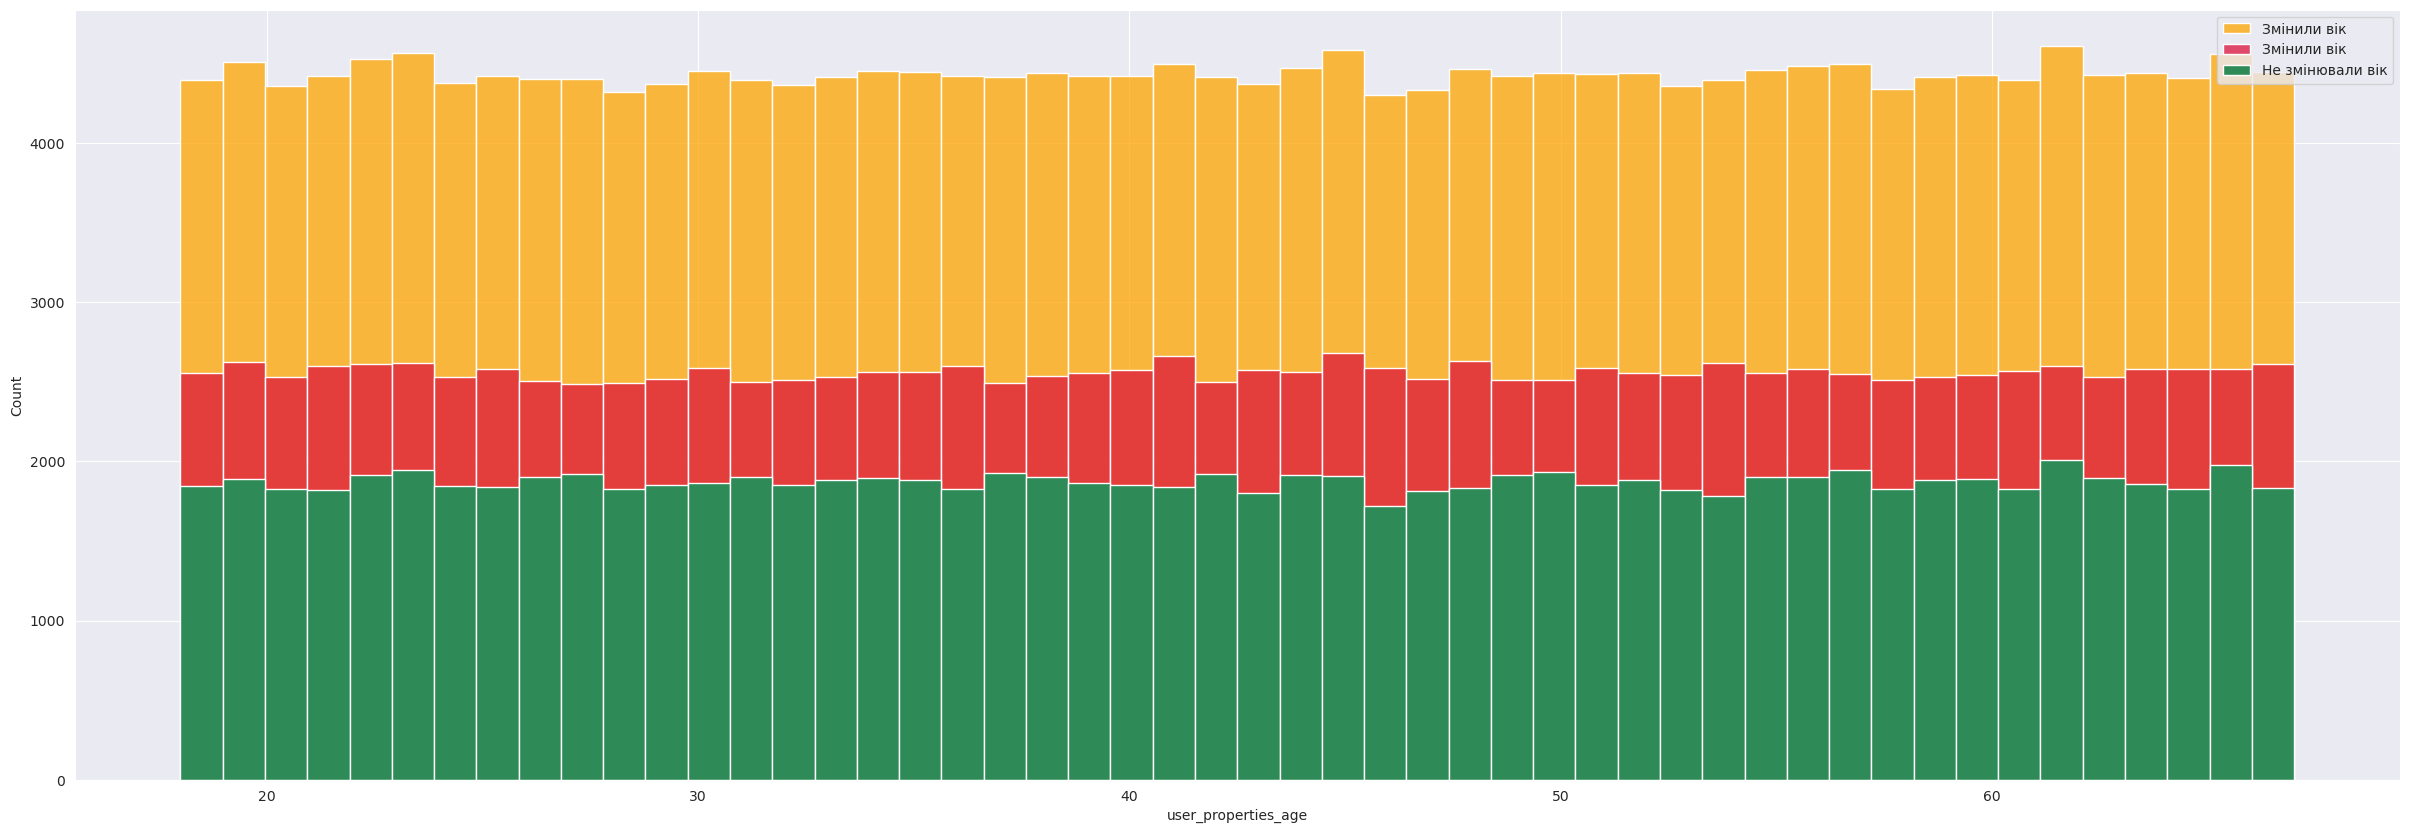

In [122]:
sns.histplot(df_cleaned.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="orange", label="Змінили вік")
sns.histplot(users_without_age_changes.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="crimson", label="Змінили вік")
sns.histplot(users_with_age_changes.drop_duplicates(subset="user_id")["user_properties_age"], bins=50, color="seagreen", label="Не змінювали вік", alpha=1)
plt.legend()
plt.show()

##### Distributions

In [38]:
def plot_event_distributions(df_name: pd.DataFrame) -> plt.Figure():

    type_event = df_name['event_type'].value_counts()
    event_format = df_name['event_properties_format'].value_counts()

    sns.set_palette("Reds")

    fig, axes = plt.subplots(1, 2, figsize=(25, 15))

    axes[0].pie(type_event, labels=type_event.index, autopct="%1.1f%%", startangle=180, colors=sns.color_palette("Reds", len(type_event)))
    axes[0].set_title("Distribution of Event Type")

    axes[1].pie(event_format, labels=event_format.index, autopct="%1.1f%%", startangle=180, colors=sns.color_palette("Reds", len(event_format)))
    axes[1].set_title("Distribution of Event Format")

    plt.tight_layout()
    plt.show()

###### Event Type and Fromat

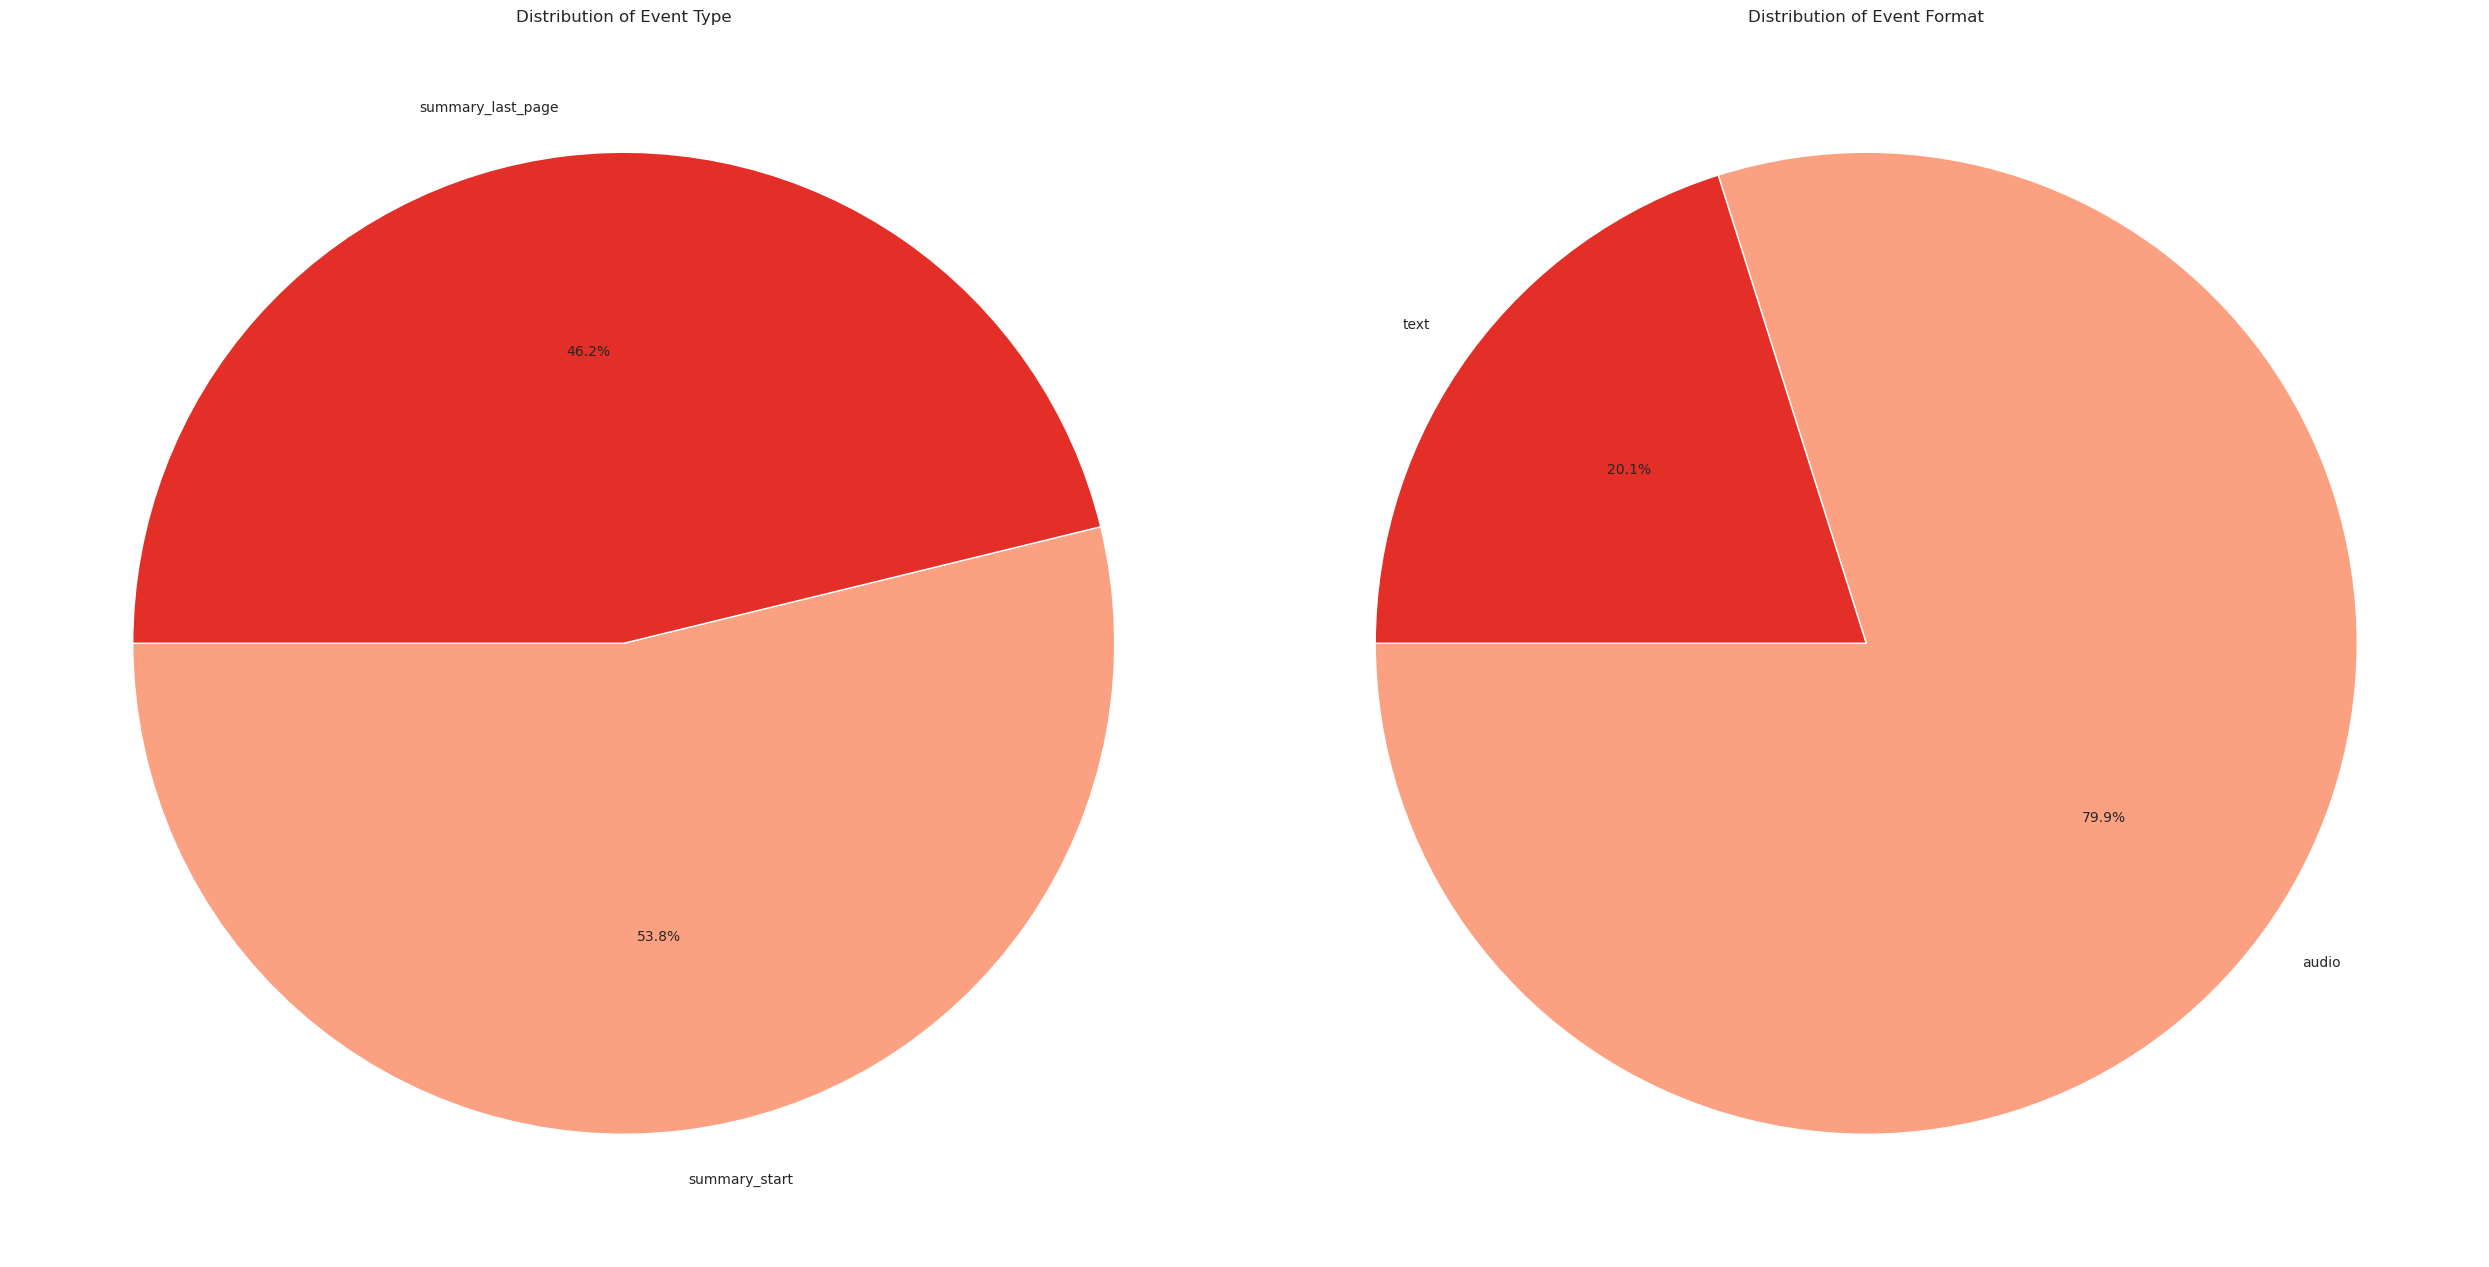

In [39]:
plot_event_distributions(df_cleaned)

In [42]:
def plot_country_activity(df_name: pd.DataFrame) -> plt.Figure():
    """
    The func visualise the distribution of counties by user
    :param df_name: The dataframe`s name
    :return: show the distribution of counties by user
    """
    top_countries = df_name["country"].value_counts().head(10)
    unique_users_per_country = df_name.groupby("country")["user_id"].nunique().nlargest(10)

    sns.set_palette("Reds")
    fig, axes = plt.subplots(1, 2, figsize=(25, 10))

    sns.barplot(x=top_countries.index, y=top_countries.values, ax=axes[0], palette="Reds")
    axes[0].set_title("Top 10 Active Countries by Total Events")
    axes[0].set_ylabel("Total Events")
    axes[0].set_xlabel("Country")
    axes[0].tick_params(axis='x', rotation=45)

    sns.barplot(x=unique_users_per_country.index, y=unique_users_per_country.values, ax=axes[1], palette="Reds")
    axes[1].set_title("Top 10 Countries by Unique Users")
    axes[1].set_ylabel("Unique Users")
    axes[1].set_xlabel("Country")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

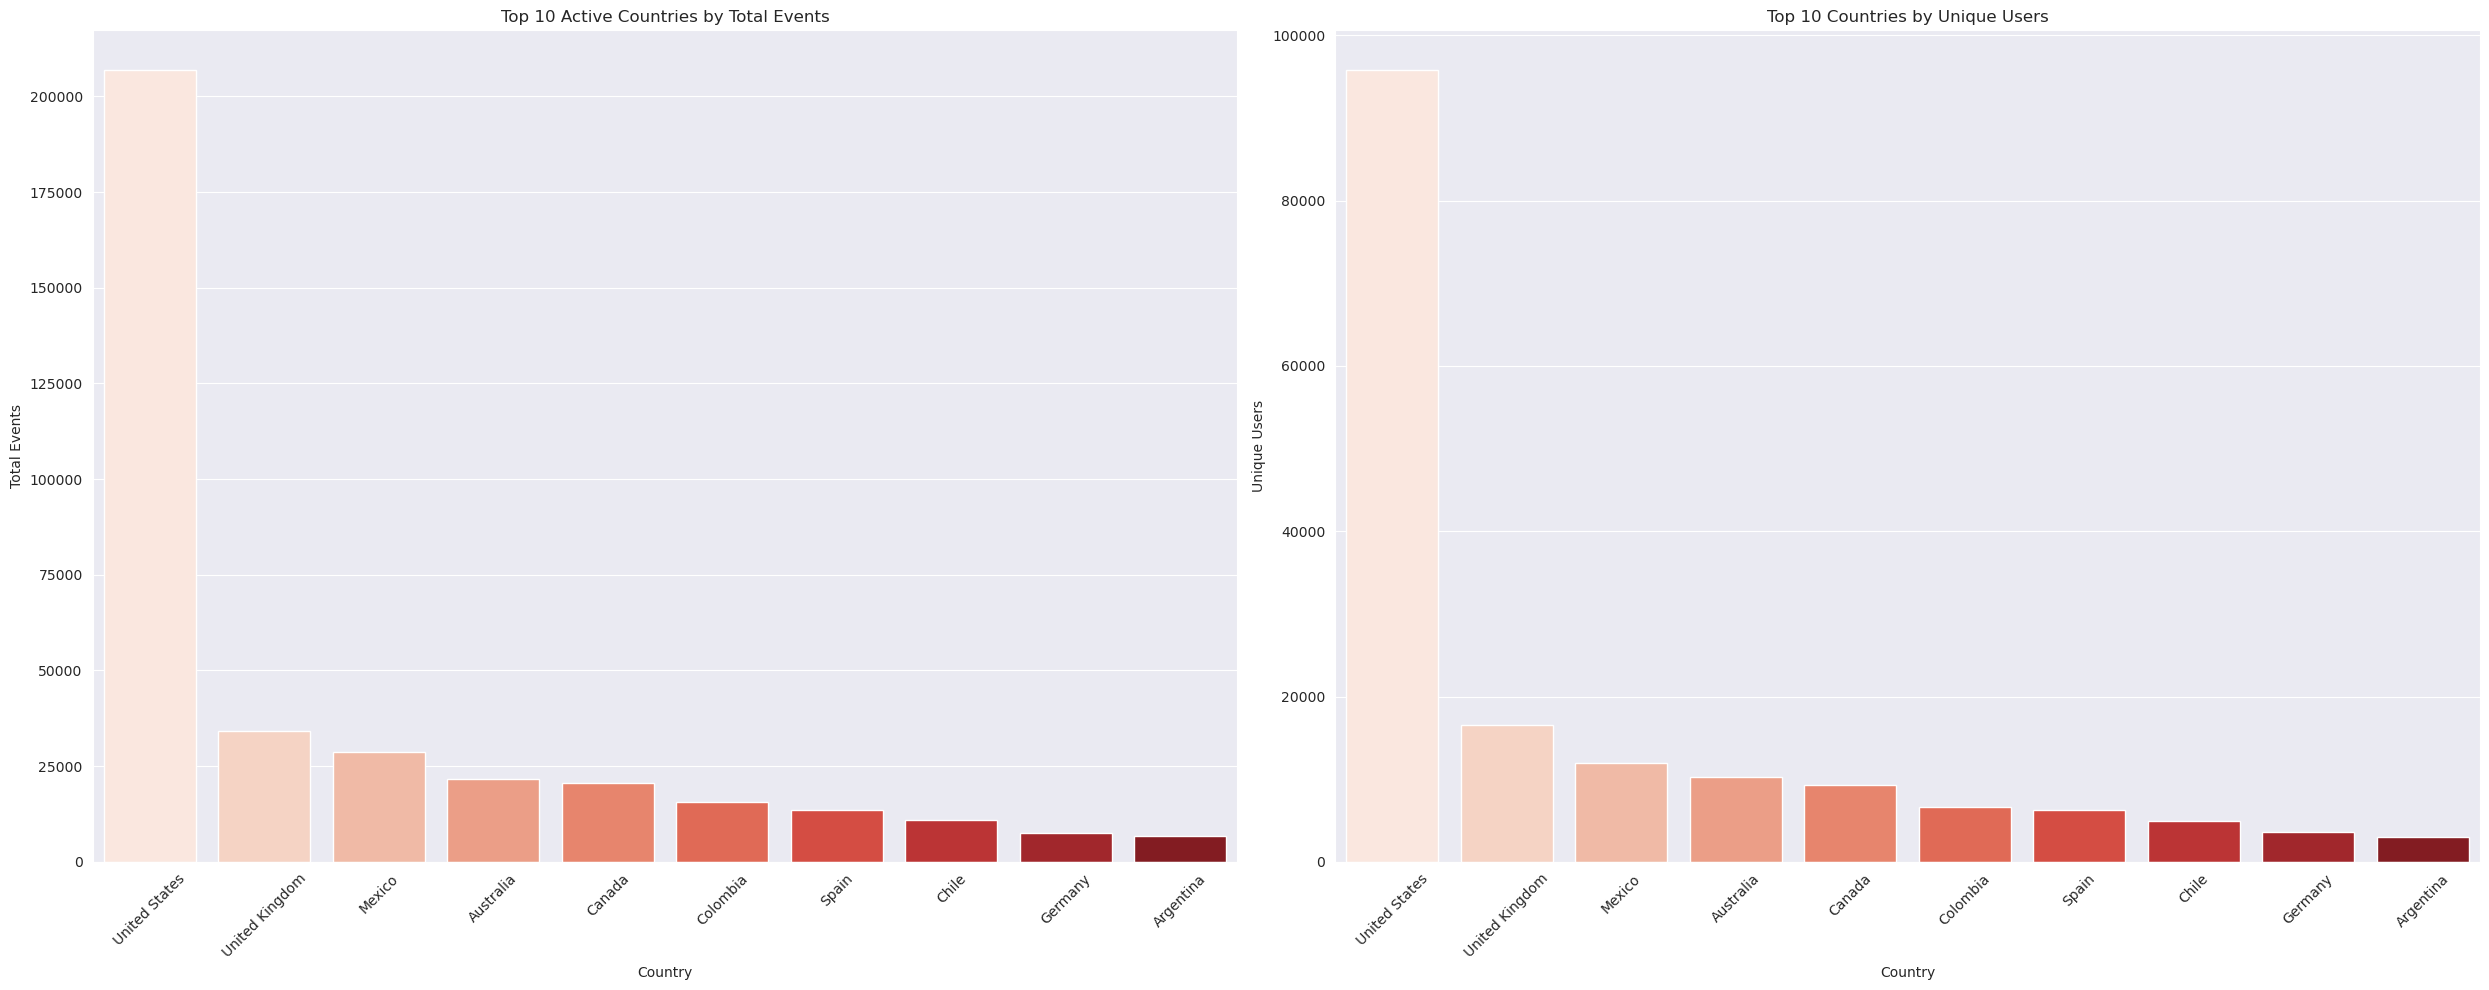

In [43]:
plot_country_activity(df_cleaned)

As we see the activity user distribution by user matches with country distribution between unique users

###### Time differences between reading summary

In [44]:
df_copy = merged_df.copy()
df_copy["event_time"] = pd.to_datetime(df_copy["event_time"], errors="coerce")
df_copy = df_copy.sort_values(by=["user_id", "event_time"])
df_copy["prev_event_time"] = df_copy.groupby("user_id")["event_time"].shift(1)
df_copy["time_diff"] = (df_copy["event_time"] - df_copy["prev_event_time"]).dt.total_seconds() / 3600

In [45]:
user_daily_reads = df_copy.groupby(["user_id", df_copy["event_time"].dt.date])["event_properties_book_id"].count().reset_index()
user_daily_reads.rename(columns={"event_properties_book_id": "daily_reads"}, inplace=True)

mean_reads = user_daily_reads["daily_reads"].mean()
std_reads = user_daily_reads["daily_reads"].std()
user_daily_reads["z_score"] = (user_daily_reads["daily_reads"] - mean_reads) / std_reads

In [46]:
outliers = user_daily_reads[user_daily_reads["daily_reads"] > 2]
outliers

,user_id,event_time,daily_reads,z_score
66,0030EYEB,2024-05-30,3,4.790604
70,004HJPZ9,2024-04-21,3,4.790604
100,008U1RZF,2024-04-14,3,4.790604
102,008U1RZF,2024-04-17,3,4.790604
137,00COSKYE,2024-06-30,3,4.790604
...,...,...,...,...
438429,ZZK7NXES,2024-05-13,3,4.790604
438433,ZZKTTDHY,2024-06-06,3,4.790604
438509,ZZQJXIDZ,2024-04-23,3,4.790604
438543,ZZT7UGNB,2024-05-25,3,4.790604


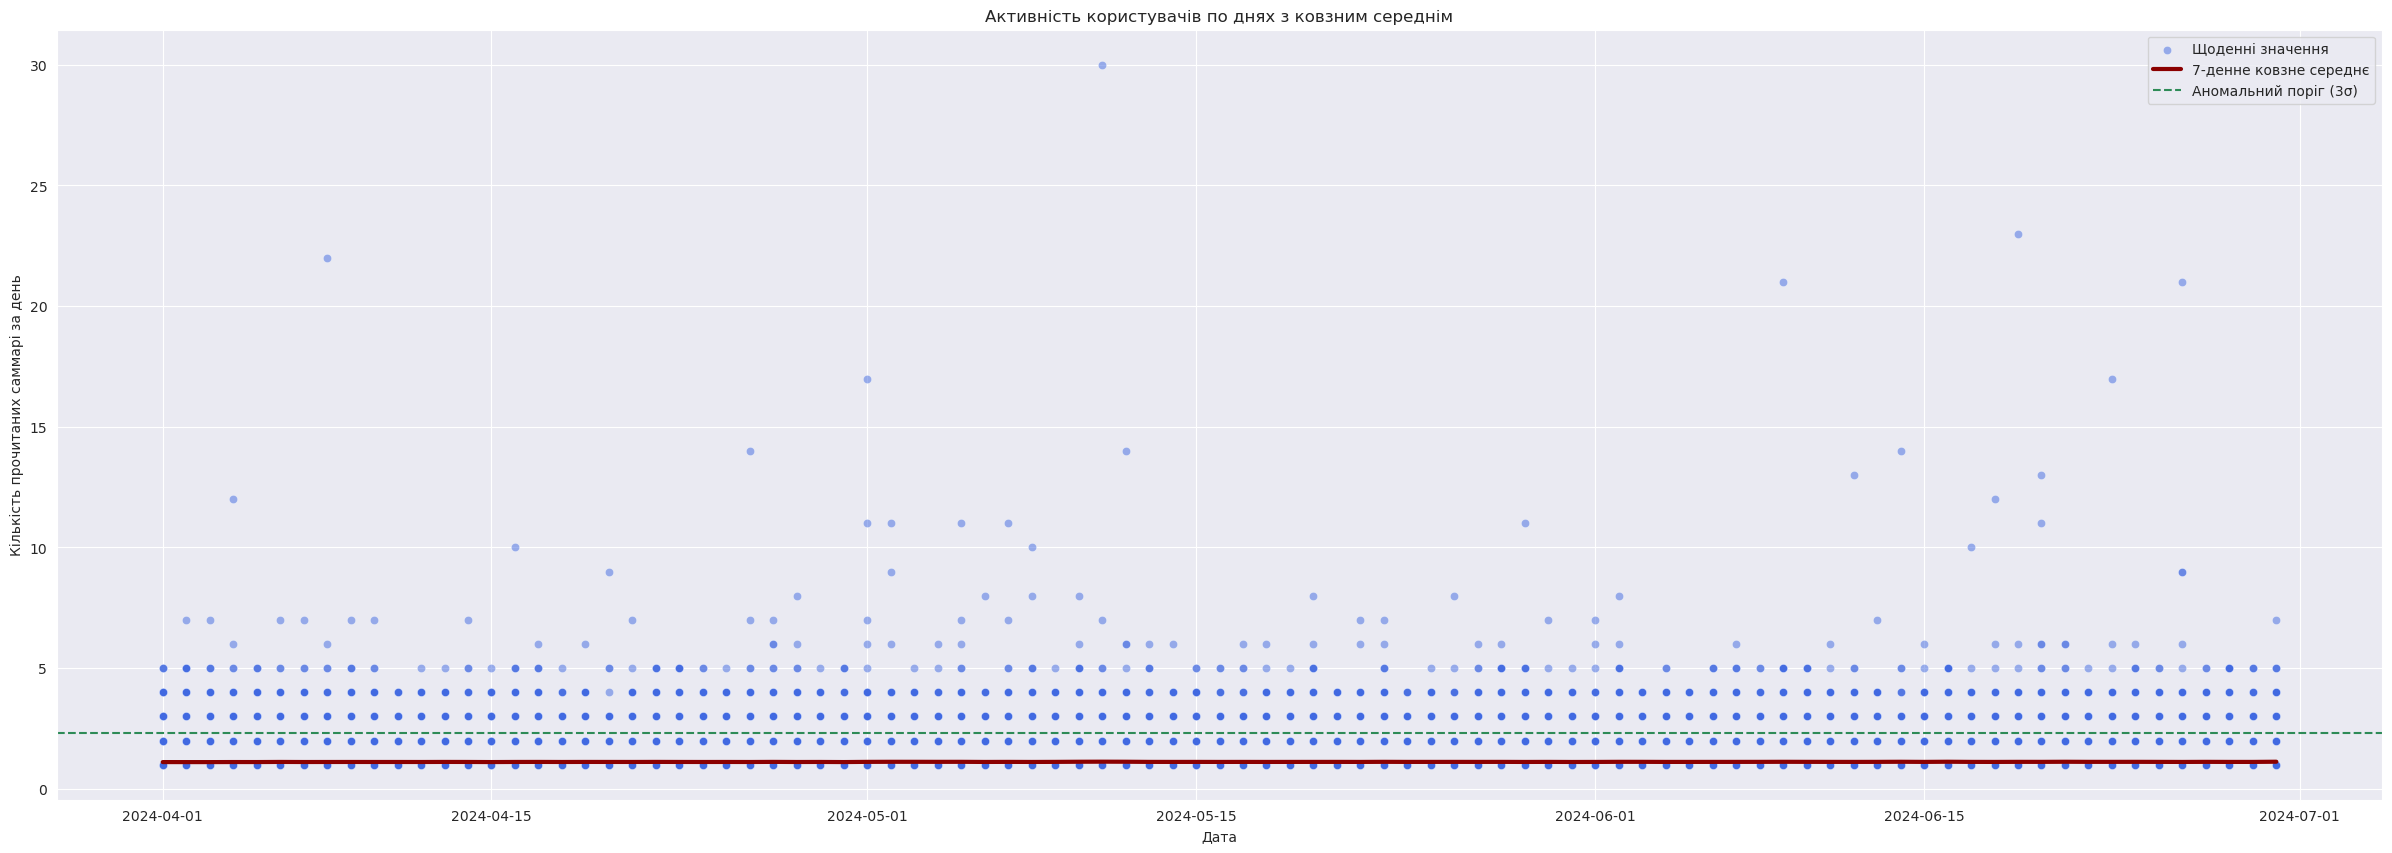

In [47]:
user_daily_reads["rolling_avg"] = user_daily_reads["daily_reads"].rolling(window=7).mean()

plt.figure(figsize=(30, 10))
sns.scatterplot(x=user_daily_reads["event_time"], y=user_daily_reads["daily_reads"], alpha=0.5, color='royalblue', label="Щоденні значення")
sns.lineplot(x=user_daily_reads["event_time"], y=user_daily_reads["rolling_avg"], color="darkred", linewidth=3, label="7-денне ковзне середнє")

plt.axhline(mean_reads + 3 * std_reads, color="seagreen", linestyle="dashed", label="Аномальний поріг (3σ)")
plt.xlabel("Дата")
plt.ylabel("Кількість прочитаних саммарі за день")
plt.title("Активність користувачів по днях з ковзним середнім")
plt.legend()
plt.show()

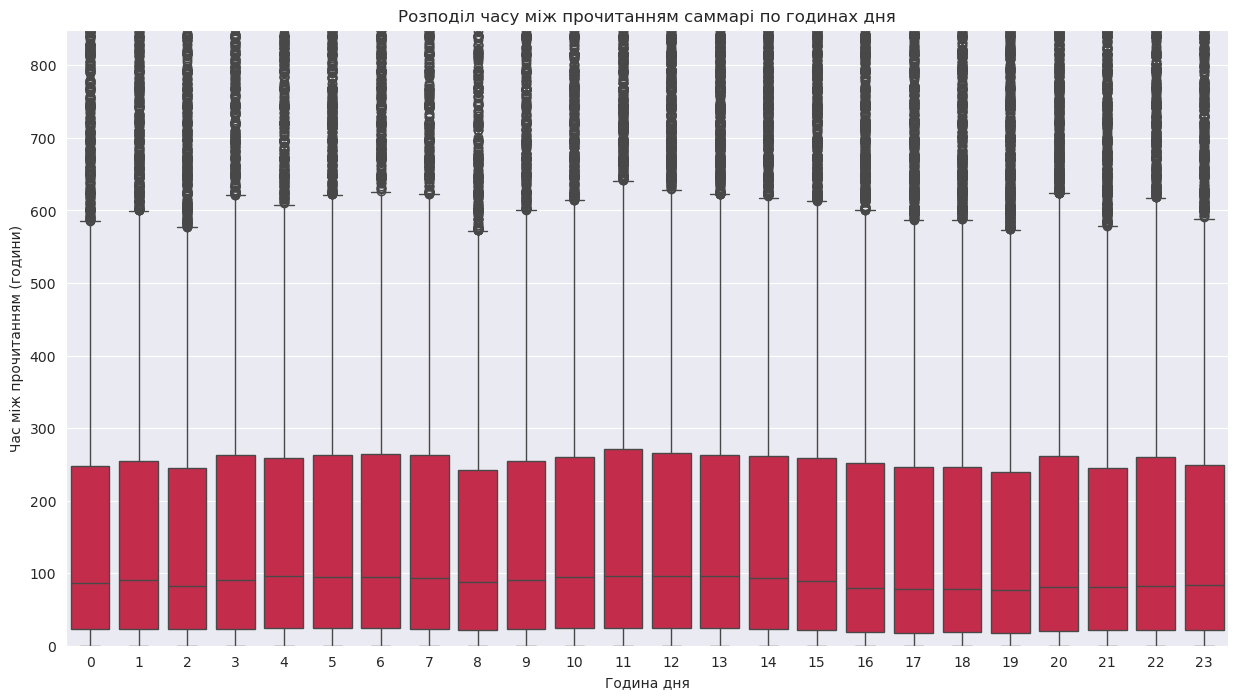

In [48]:
df_copy["event_time"] = pd.to_datetime(df_copy["event_time"], errors="coerce")
df_copy["hour"] = df_copy["event_time"].dt.hour
df_copy["time_diff"] = df_copy.groupby("user_id")["event_time"].diff().dt.total_seconds() / 3600

plt.figure(figsize=(15, 8))
sns.boxplot(x=df_copy["hour"], y=df_copy["time_diff"], color="crimson")
plt.ylim(0, df_copy["time_diff"].quantile(0.95))
plt.xlabel("Година дня")
plt.ylabel("Час між прочитанням (години)")
plt.title("Розподіл часу між прочитанням саммарі по годинах дня")
plt.show()

#### Other

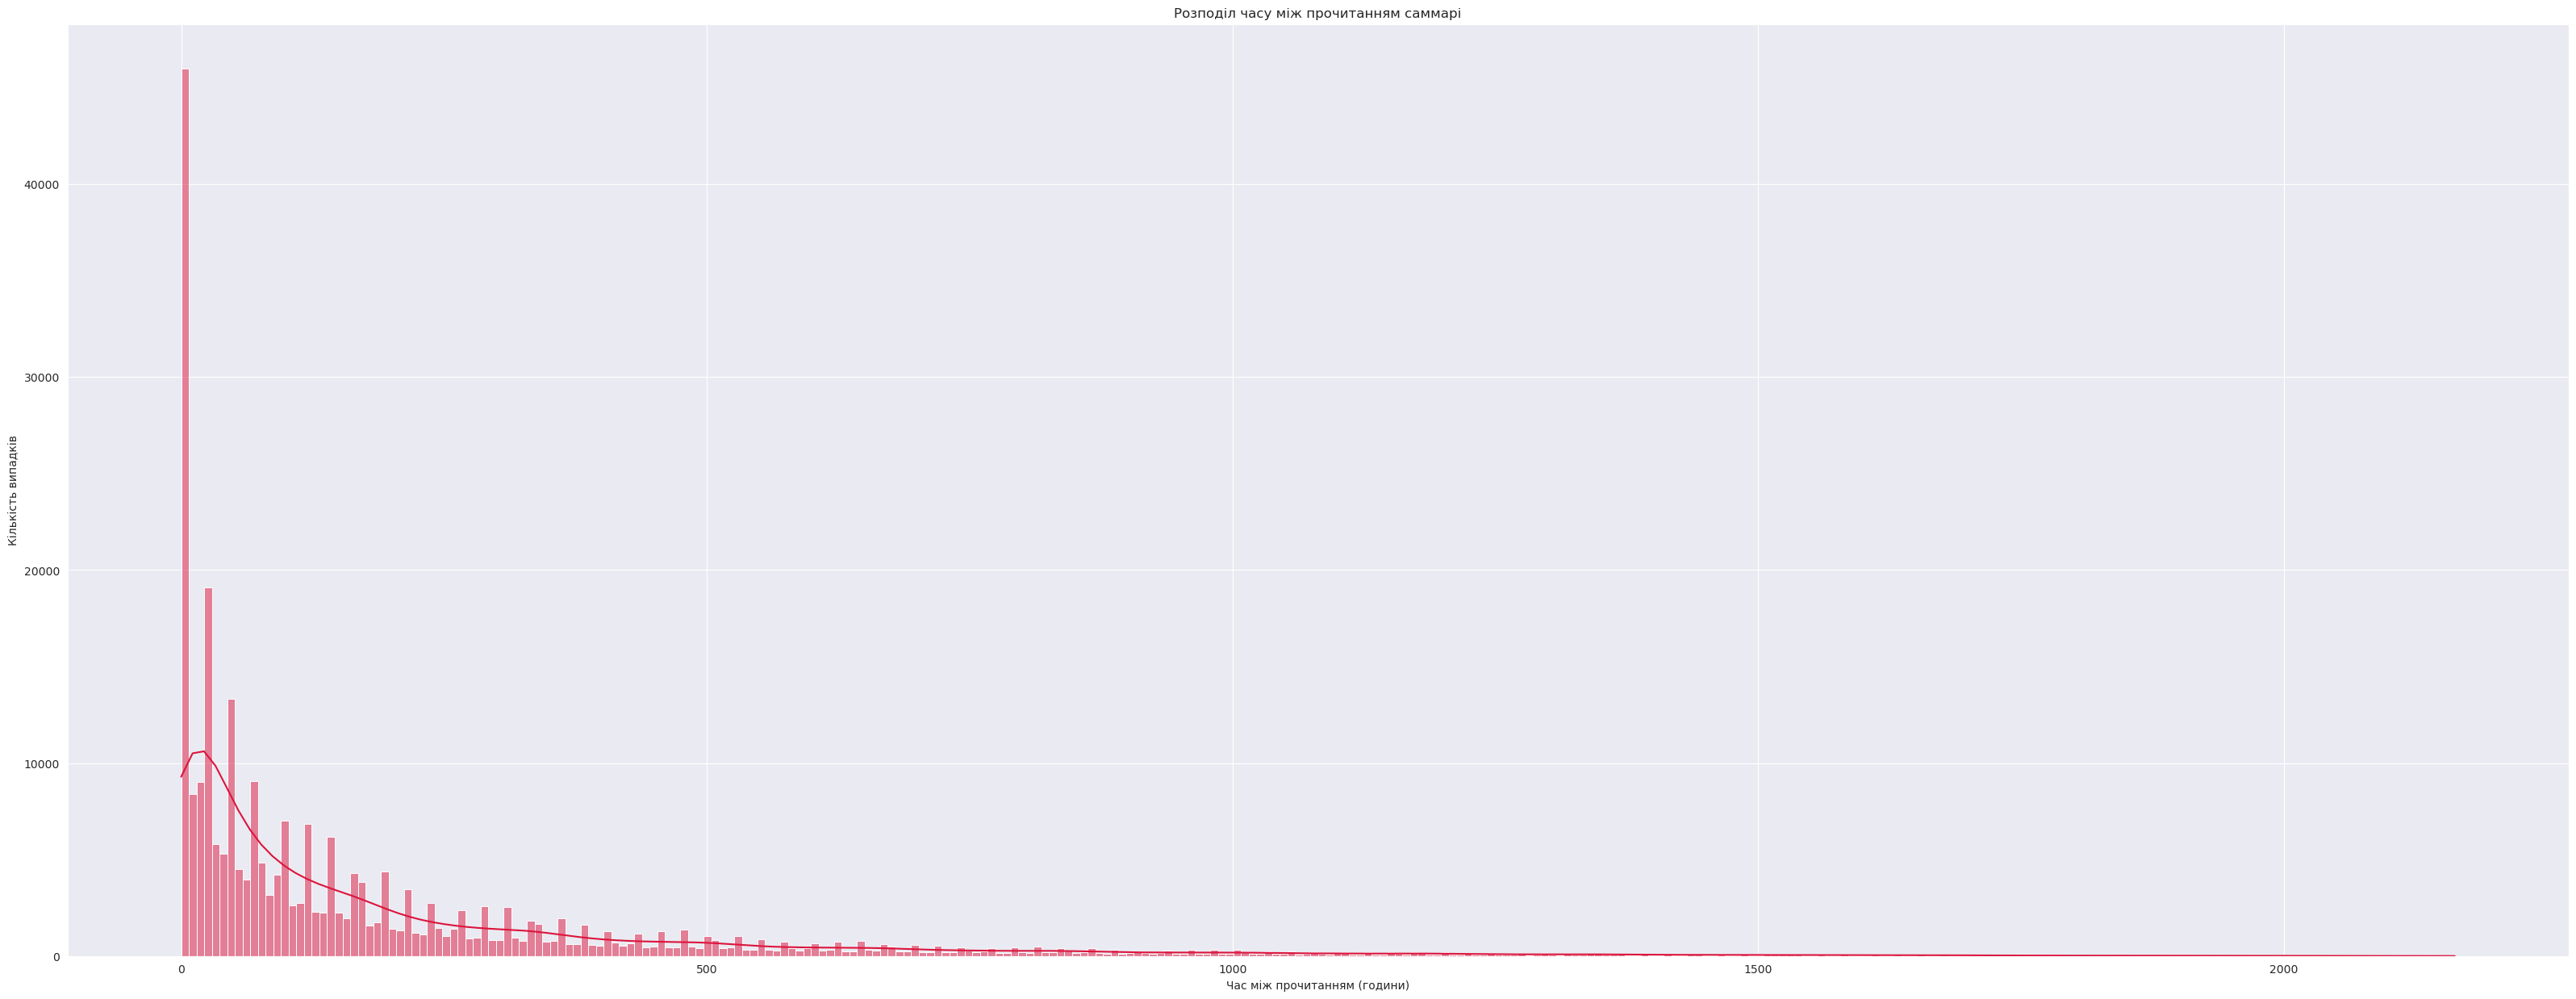

In [49]:
plt.figure(figsize=(40, 15))
sns.histplot(df_copy["time_diff"], kde=True, color="crimson")
plt.xlabel("Час між прочитанням (години)")
plt.ylabel("Кількість випадків")
plt.title("Розподіл часу між прочитанням саммарі")
plt.show()

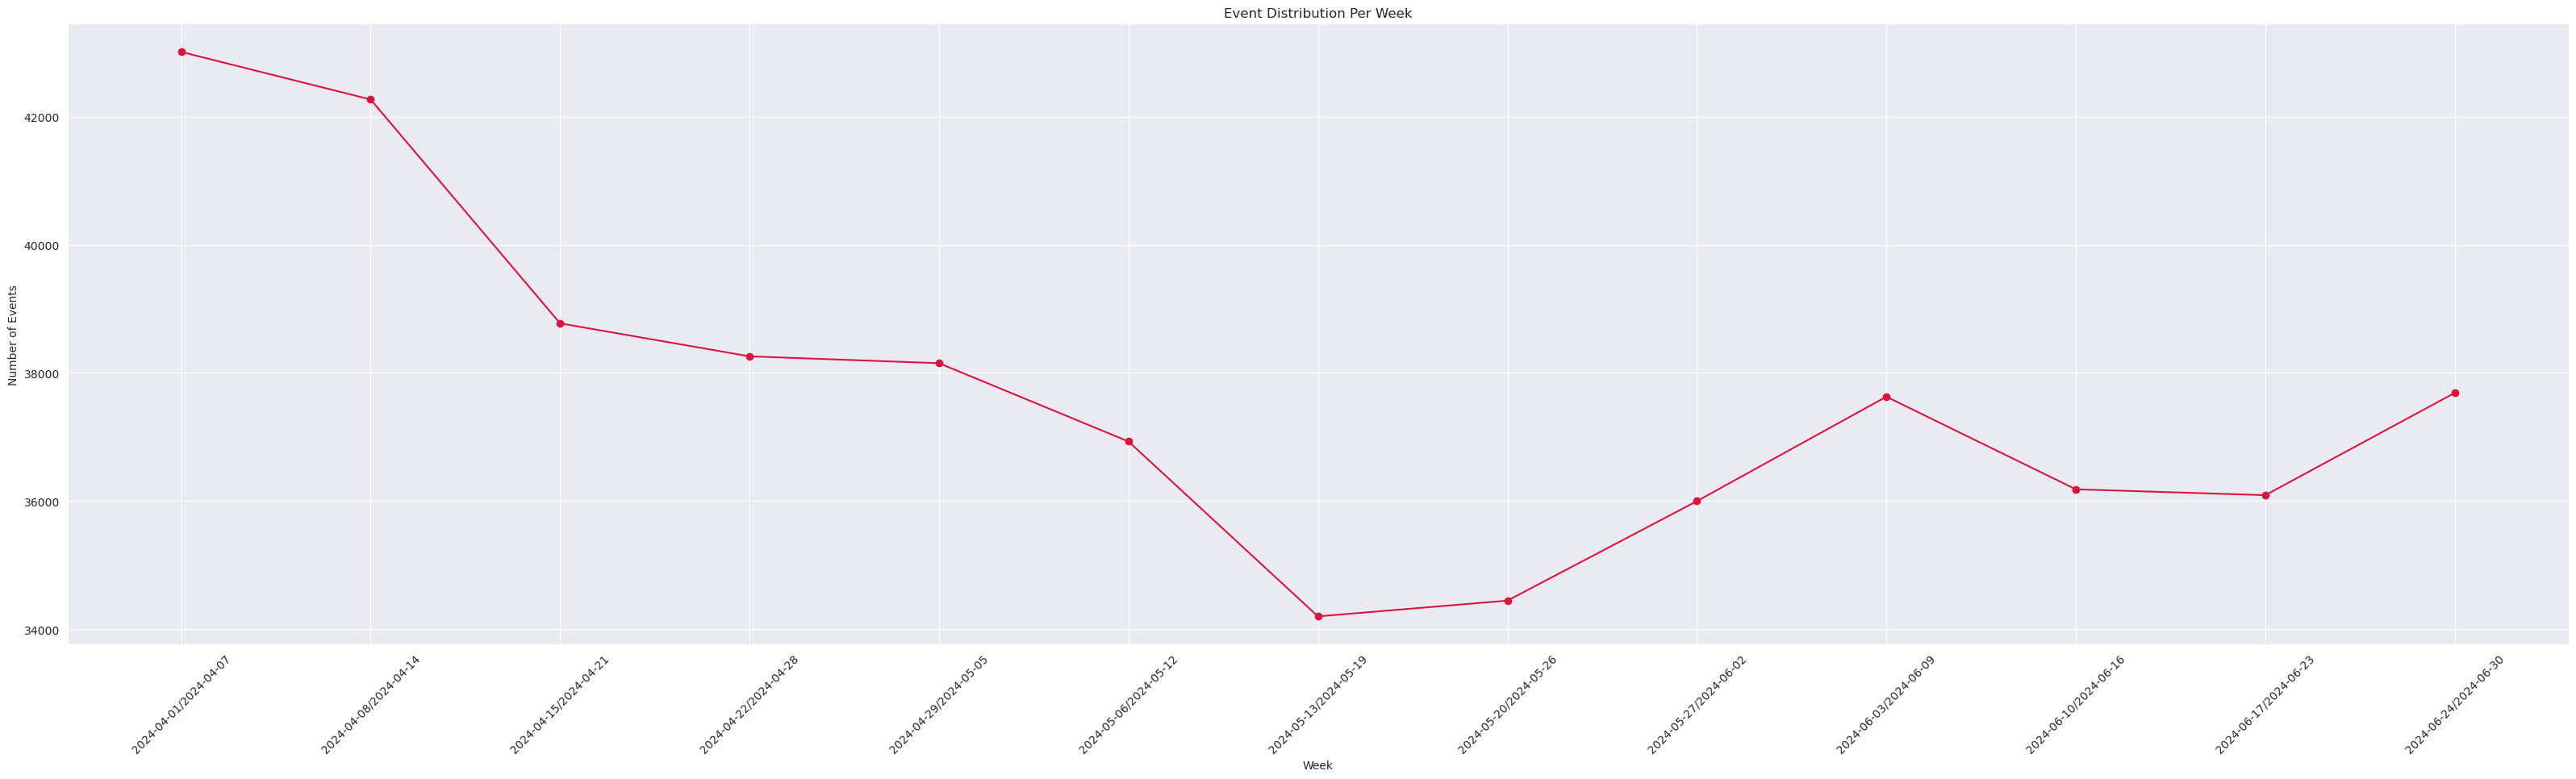

In [50]:
def event_per_week(df_name: pd.DataFrame) -> plt.Figure():

    df_name["event_time"] = pd.to_datetime(df_name["event_time"])
    event_counts_weekly = df_name["event_time"].dt.to_period("W").value_counts().sort_index()

    plt.figure(figsize=(40, 10))
    plt.plot(event_counts_weekly.index.astype(str), event_counts_weekly.values, marker="o", linestyle="-", color="crimson")
    plt.xlabel("Week")
    plt.ylabel("Number of Events")
    plt.title("Event Distribution Per Week")
    plt.xticks(rotation=45)
    plt.show()

event_per_week(df_cleaned)

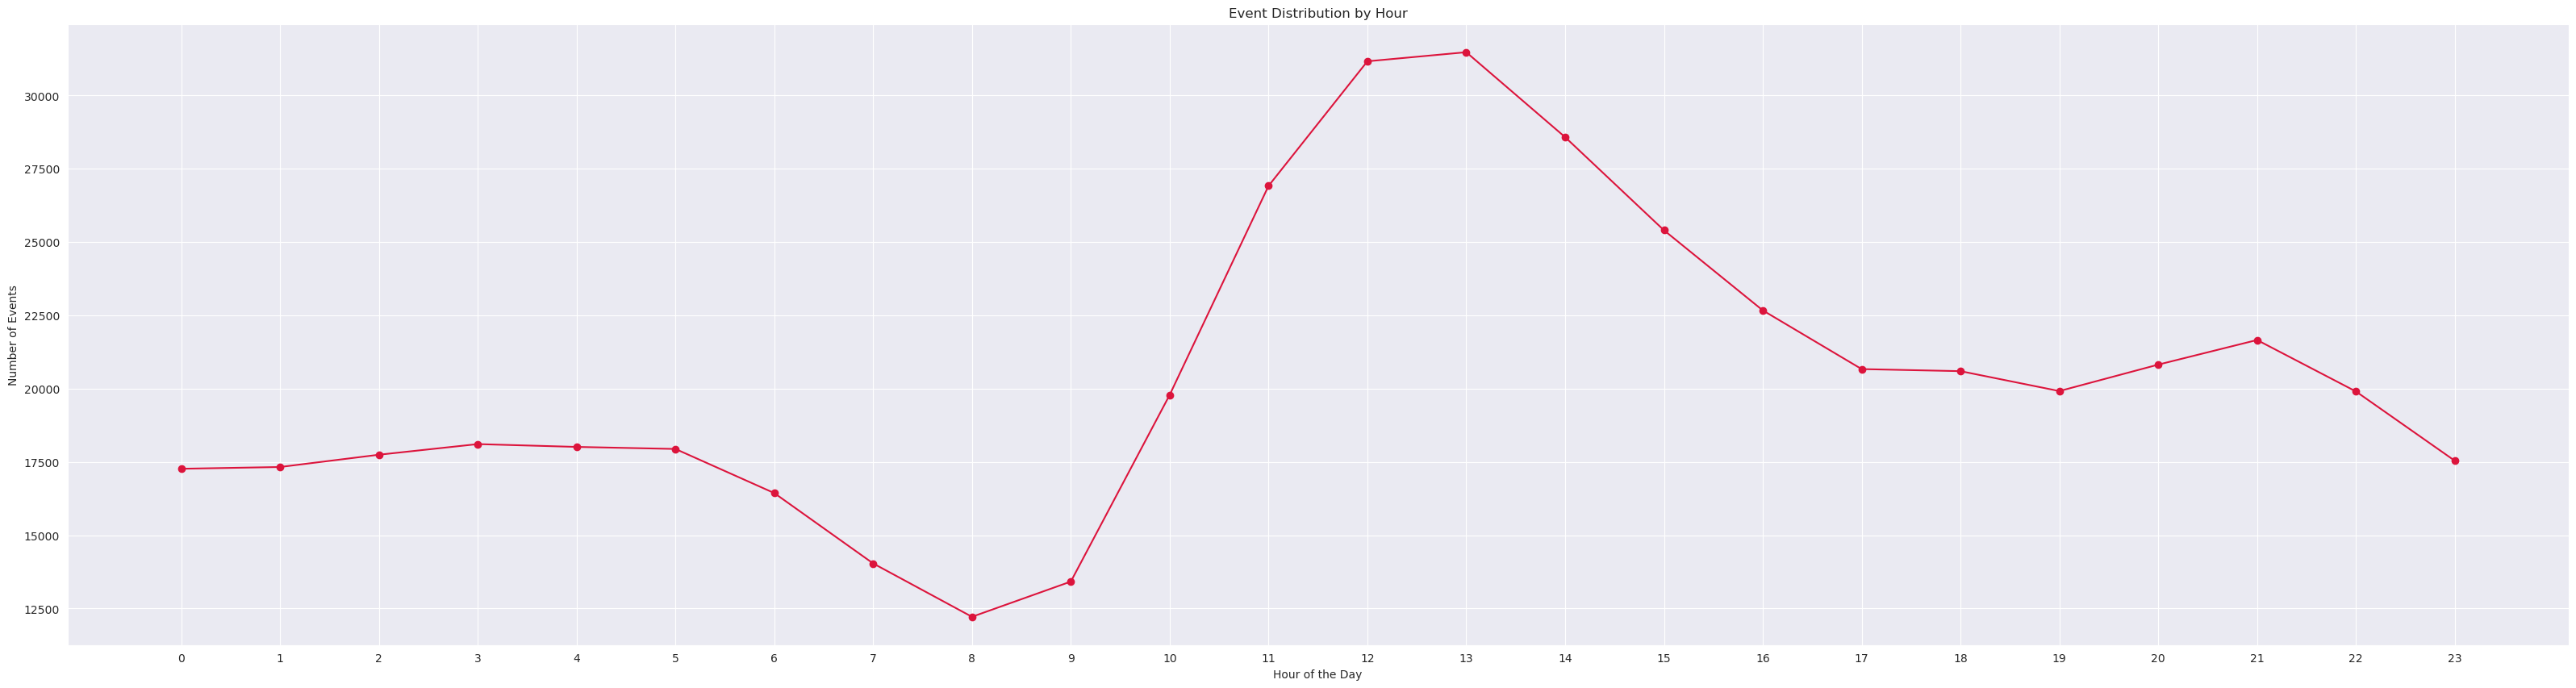

In [51]:
df["event_time"] = pd.to_datetime(df["event_time"])
event_counts_hourly = df["event_time"].dt.hour.value_counts().sort_index()

plt.figure(figsize=(40, 10))
plt.plot(event_counts_hourly.index, event_counts_hourly.values, marker="o", linestyle="-", color="crimson")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Events")
plt.title("Event Distribution by Hour")
plt.xticks(range(24))
plt.show()

In [52]:
outliers = user_daily_reads[user_daily_reads["daily_reads"] > 2]
outliers_merged = outliers.merge(
    merged_df[['user_id', 'event_time', 'event_properties_book_id', 'event_properties_format',
               'user_properties_age', 'country', 'topic']],
    on=["user_id", "event_time"],
    how="left"
)

outliers

,user_id,event_time,daily_reads,z_score,rolling_avg
66,0030EYEB,2024-05-30,3,4.790604,1.428571
70,004HJPZ9,2024-04-21,3,4.790604,1.571429
100,008U1RZF,2024-04-14,3,4.790604,1.428571
102,008U1RZF,2024-04-17,3,4.790604,1.714286
137,00COSKYE,2024-06-30,3,4.790604,1.285714
...,...,...,...,...,...
438429,ZZK7NXES,2024-05-13,3,4.790604,1.428571
438433,ZZKTTDHY,2024-06-06,3,4.790604,1.571429
438509,ZZQJXIDZ,2024-04-23,3,4.790604,1.571429
438543,ZZT7UGNB,2024-05-25,3,4.790604,1.571429


In [53]:
user_daily_reads

,user_id,event_time,daily_reads,z_score,rolling_avg
0,0001M3PA,2024-04-09,1,-0.295741,NaN
1,00036L7K,2024-06-11,1,-0.295741,NaN
2,000EASFZ,2024-04-11,1,-0.295741,NaN
3,000EASFZ,2024-04-20,1,-0.295741,NaN
4,000EASFZ,2024-05-06,1,-0.295741,NaN
...,...,...,...,...,...
438621,ZZYY8S7C,2024-04-30,1,-0.295741,1.142857
438622,ZZZ06MW2,2024-06-05,1,-0.295741,1.000000
438623,ZZZ128XJ,2024-04-25,2,2.247432,1.142857
438624,ZZZ128XJ,2024-06-05,1,-0.295741,1.142857


In [57]:
# df[df['user_id'] == '000EASFZ']
df[df['user_id'] == 'TQLQQLV6']

,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age
54223,54223,TQLQQLV6,2024-06-26 20:46:49,United States,summary_last_page,d9c5984592174ac3a855,audio,39.0
86983,86983,TQLQQLV6,2024-06-26 20:46:41,United States,summary_last_page,d9c5984592174ac3a855,audio,46.0
169246,169246,TQLQQLV6,2024-06-26 20:46:43,United States,summary_last_page,d9c5984592174ac3a855,audio,30.0
208086,208086,TQLQQLV6,2024-06-26 20:46:45,United States,summary_last_page,d9c5984592174ac3a855,audio,49.0
267173,267173,TQLQQLV6,2024-06-26 20:48:00,United States,summary_start,7jlIJDFk4DmgTfJuyFLc,audio,63.0
390662,390662,TQLQQLV6,2024-06-26 20:46:48,United States,summary_last_page,d9c5984592174ac3a855,audio,37.0
442619,442619,TQLQQLV6,2024-06-26 20:46:46,United States,summary_last_page,d9c5984592174ac3a855,audio,20.0
470108,470108,TQLQQLV6,2024-06-26 20:46:50,United States,summary_last_page,d9c5984592174ac3a855,audio,49.0
519802,519802,TQLQQLV6,2024-06-26 20:46:42,United States,summary_last_page,d9c5984592174ac3a855,audio,22.0


In [85]:
users_without_age_changes = df_copy[~df_copy["user_id"].isin(users_with_changes_ids)]
users_without_age_changes[users_without_age_changes['user_id'] == 'O19DCQ97']


,Unnamed: 0,user_id,event_time,country,event_type,event_properties_book_id,event_properties_format,user_properties_age,topic,event_date,previous_age
314189,335799,O19DCQ97,2024-06-14 10:15:36,Dominican Republic,summary_last_page,8d9512d39b14461a9d47,text,46.0,Unknown,2024-06-14,NaN
431417,461009,O19DCQ97,2024-06-18 15:26:24,Dominican Republic,summary_start,9114326ab1e54a3fabfe,audio,46.0,Negotiation Skills,2024-06-18,46.0


In [84]:
# age_distribution(users_without_age_changes)
# age_distribution(users_without_age_changes, unique=True)
users_without_age_changes.user_id.value_counts()

user_id
KRTTZYAZ    3
V1WA8HBI    3
TCSW3NGX    3
XOLTP31D    3
VKDDGTUT    3
           ..
4D96O00T    1
GFB1V4I7    1
BKJBVC36    1
EI0VVVFP    1
KFA03YPX    1
Name: count, Length: 128073, dtype: int64

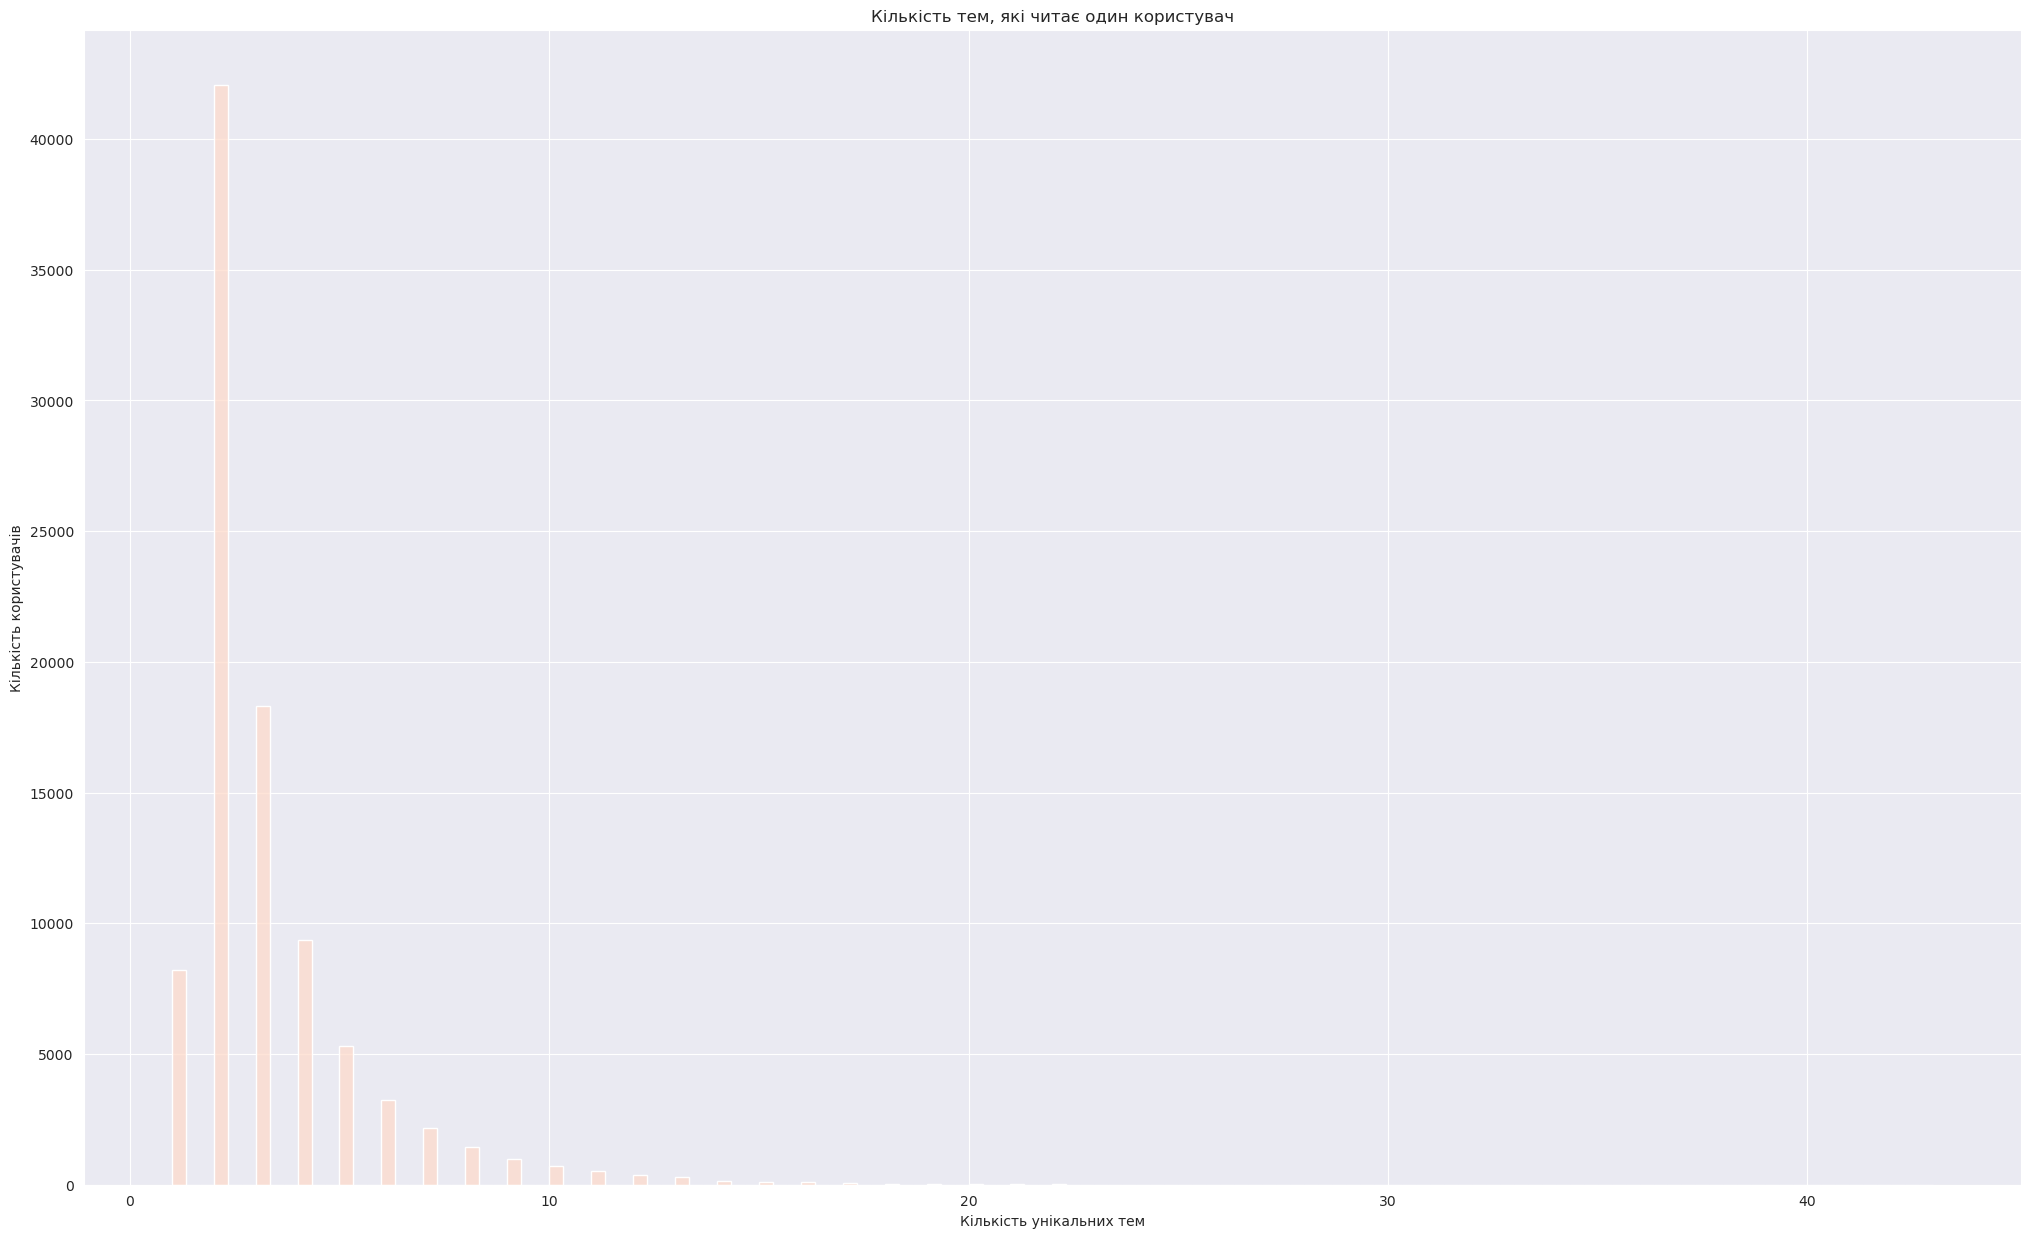

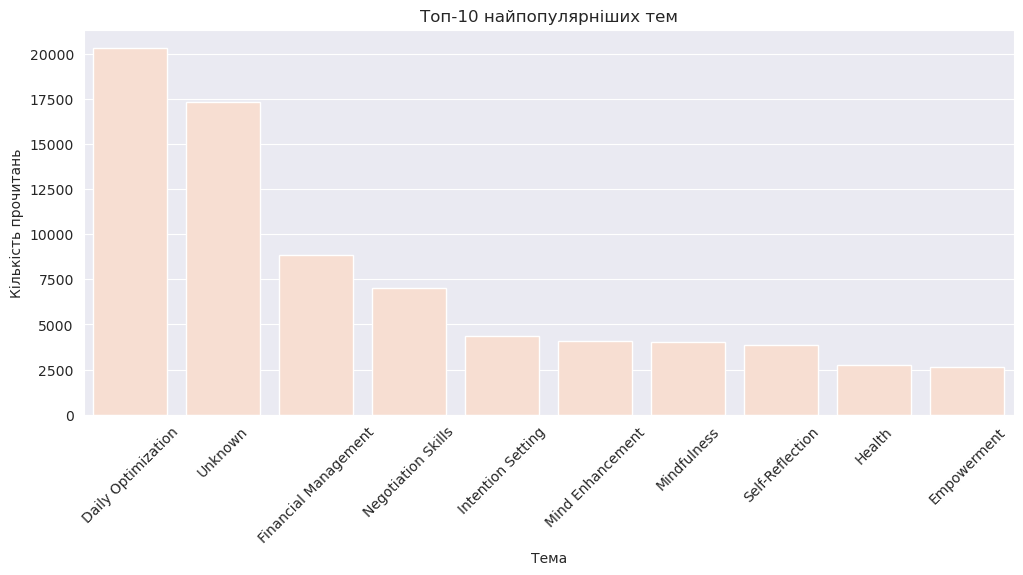

In [64]:
# Кількість унікальних тем, які прочитав кожен користувач
user_topic_counts = users_with_age_changes.groupby("user_id")["topic"].nunique()

plt.figure(figsize=(25, 15))
sns.histplot(user_topic_counts, bins=126)
plt.title("Кількість тем, які читає один користувач")
plt.xlabel("Кількість унікальних тем")
plt.ylabel("Кількість користувачів")
plt.show()

# Популярність тем
topic_counts = users_without_age_changes["topic"].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=topic_counts.index[:10], y=topic_counts.values[:10])
plt.xticks(rotation=45)
plt.title("Топ-10 найпопулярніших тем")
plt.xlabel("Тема")
plt.ylabel("Кількість прочитань")
plt.show()


In [65]:
df_copy[df_copy["user_id"].isin(users_with_changes_ids)][["user_id", "event_time", "user_properties_age"]].sort_values(by=["user_id", "event_time"])


,user_id,event_time,user_properties_age
104510,000EASFZ,2024-04-11 23:08:29,28.0
268774,000EASFZ,2024-04-20 19:27:49,54.0
38908,000EASFZ,2024-05-06 04:21:53,25.0
2411,000EASFZ,2024-05-15 10:35:30,31.0
318919,000EASFZ,2024-05-20 08:51:16,58.0
...,...,...,...
311316,ZZYEFUOG,2024-06-25 00:50:34,53.0
195877,ZZZ128XJ,2024-04-25 14:36:55,34.0
380102,ZZZ128XJ,2024-04-25 18:04:34,36.0
153984,ZZZ128XJ,2024-06-05 17:53:43,54.0


In [66]:
df_copy[df_copy["user_id"].isin(users_with_changes_ids)]["user_id"].value_counts().head(20)



user_id
O608SMH5    107
PHS975R4     93
Y58F6GCD     92
OU037AKN     88
KTREUFV8     85
J6RP4VVQ     66
EQOIXN56     65
7QO0FY2O     64
VTWLUKUX     61
NV1AU710     61
EAFUKS75     59
J0UZ4O9S     58
XCPZYGHQ     57
UPVCJEB2     56
Y3DXD58I     52
W13YMNM2     52
BQ8W43BE     51
BZI1GGFI     51
BYEWHT3I     51
ADLSFX2F     50
Name: count, dtype: int64

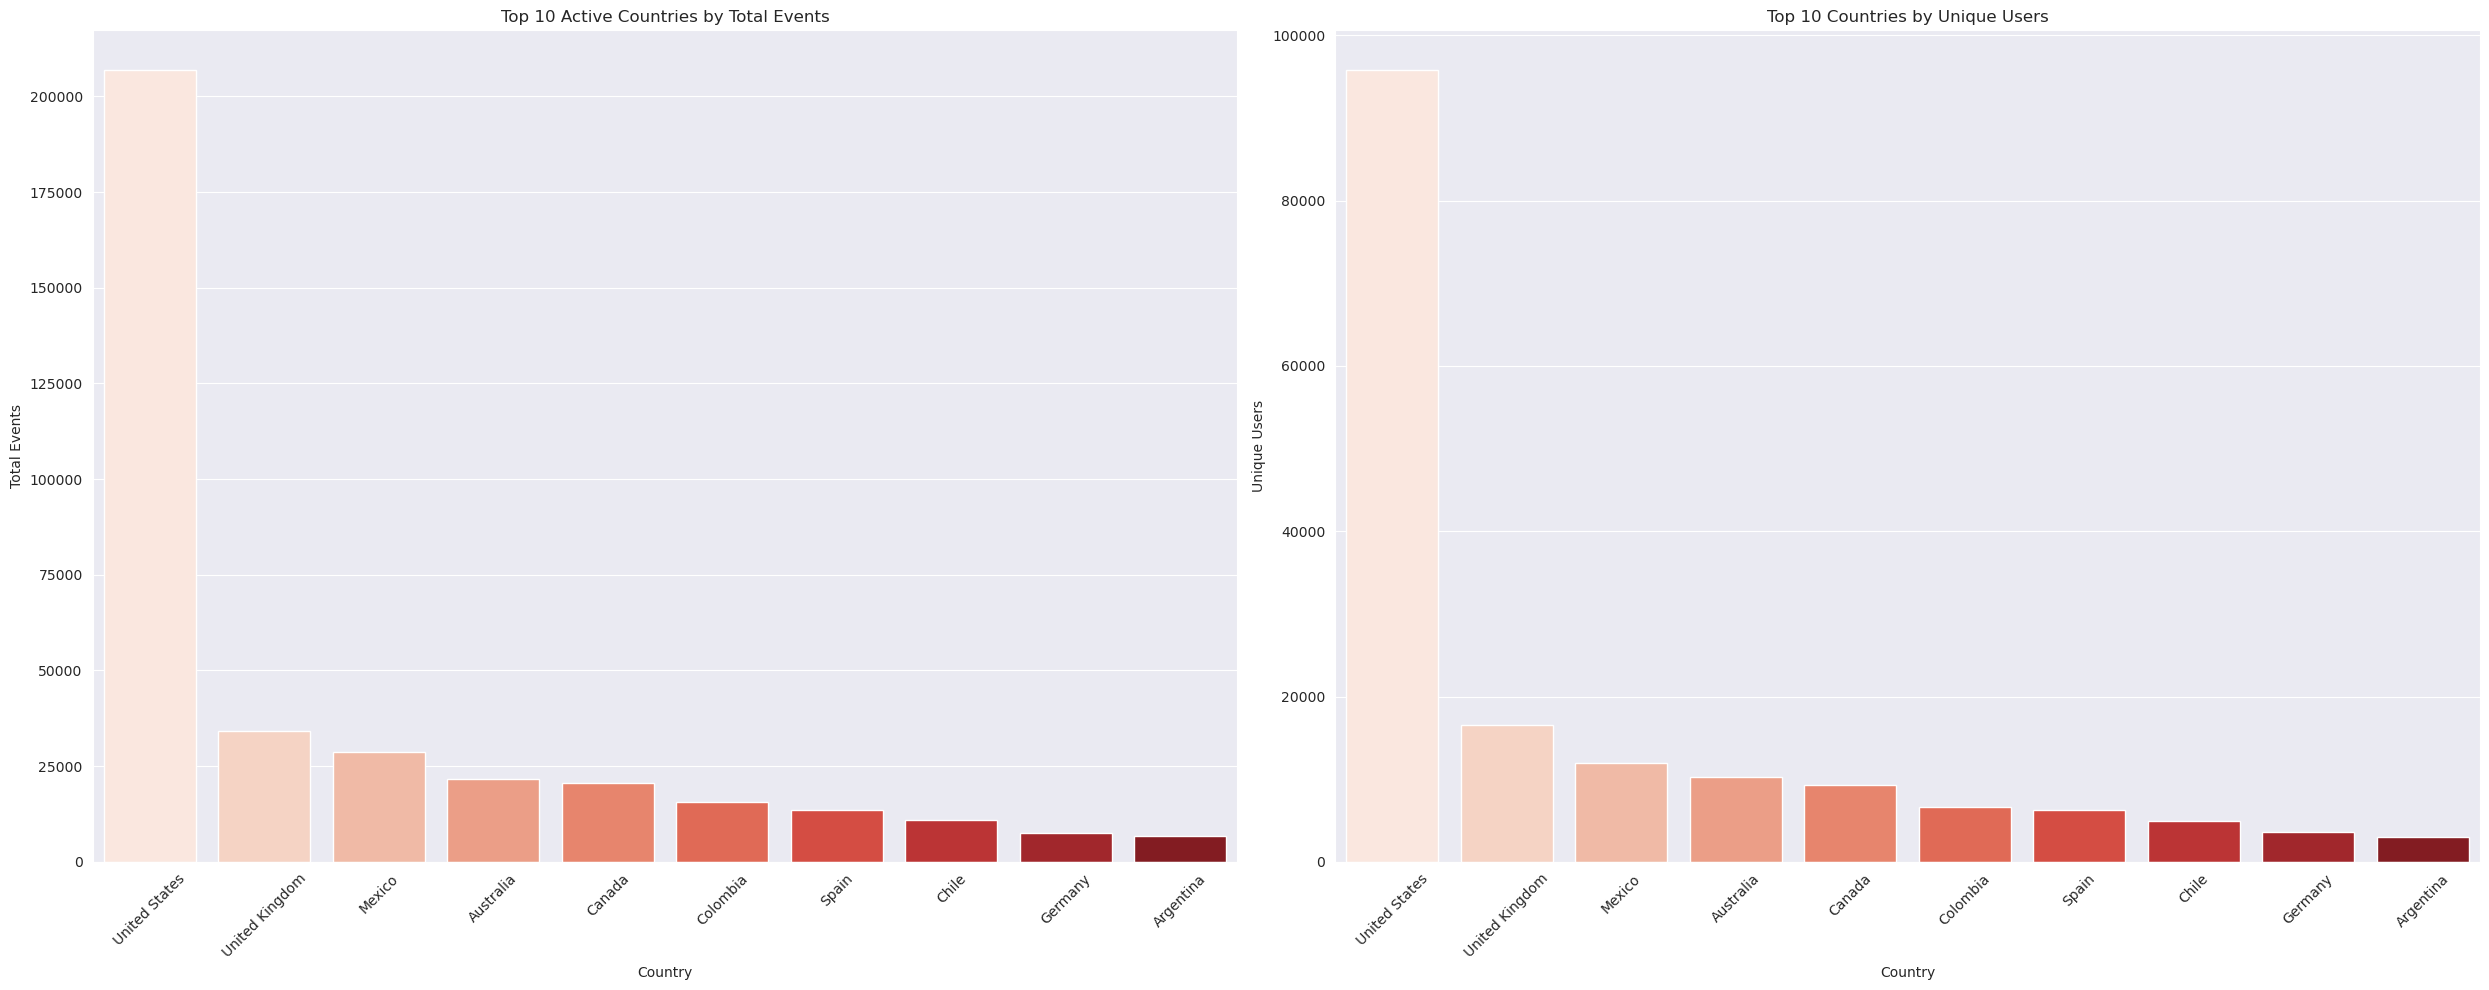

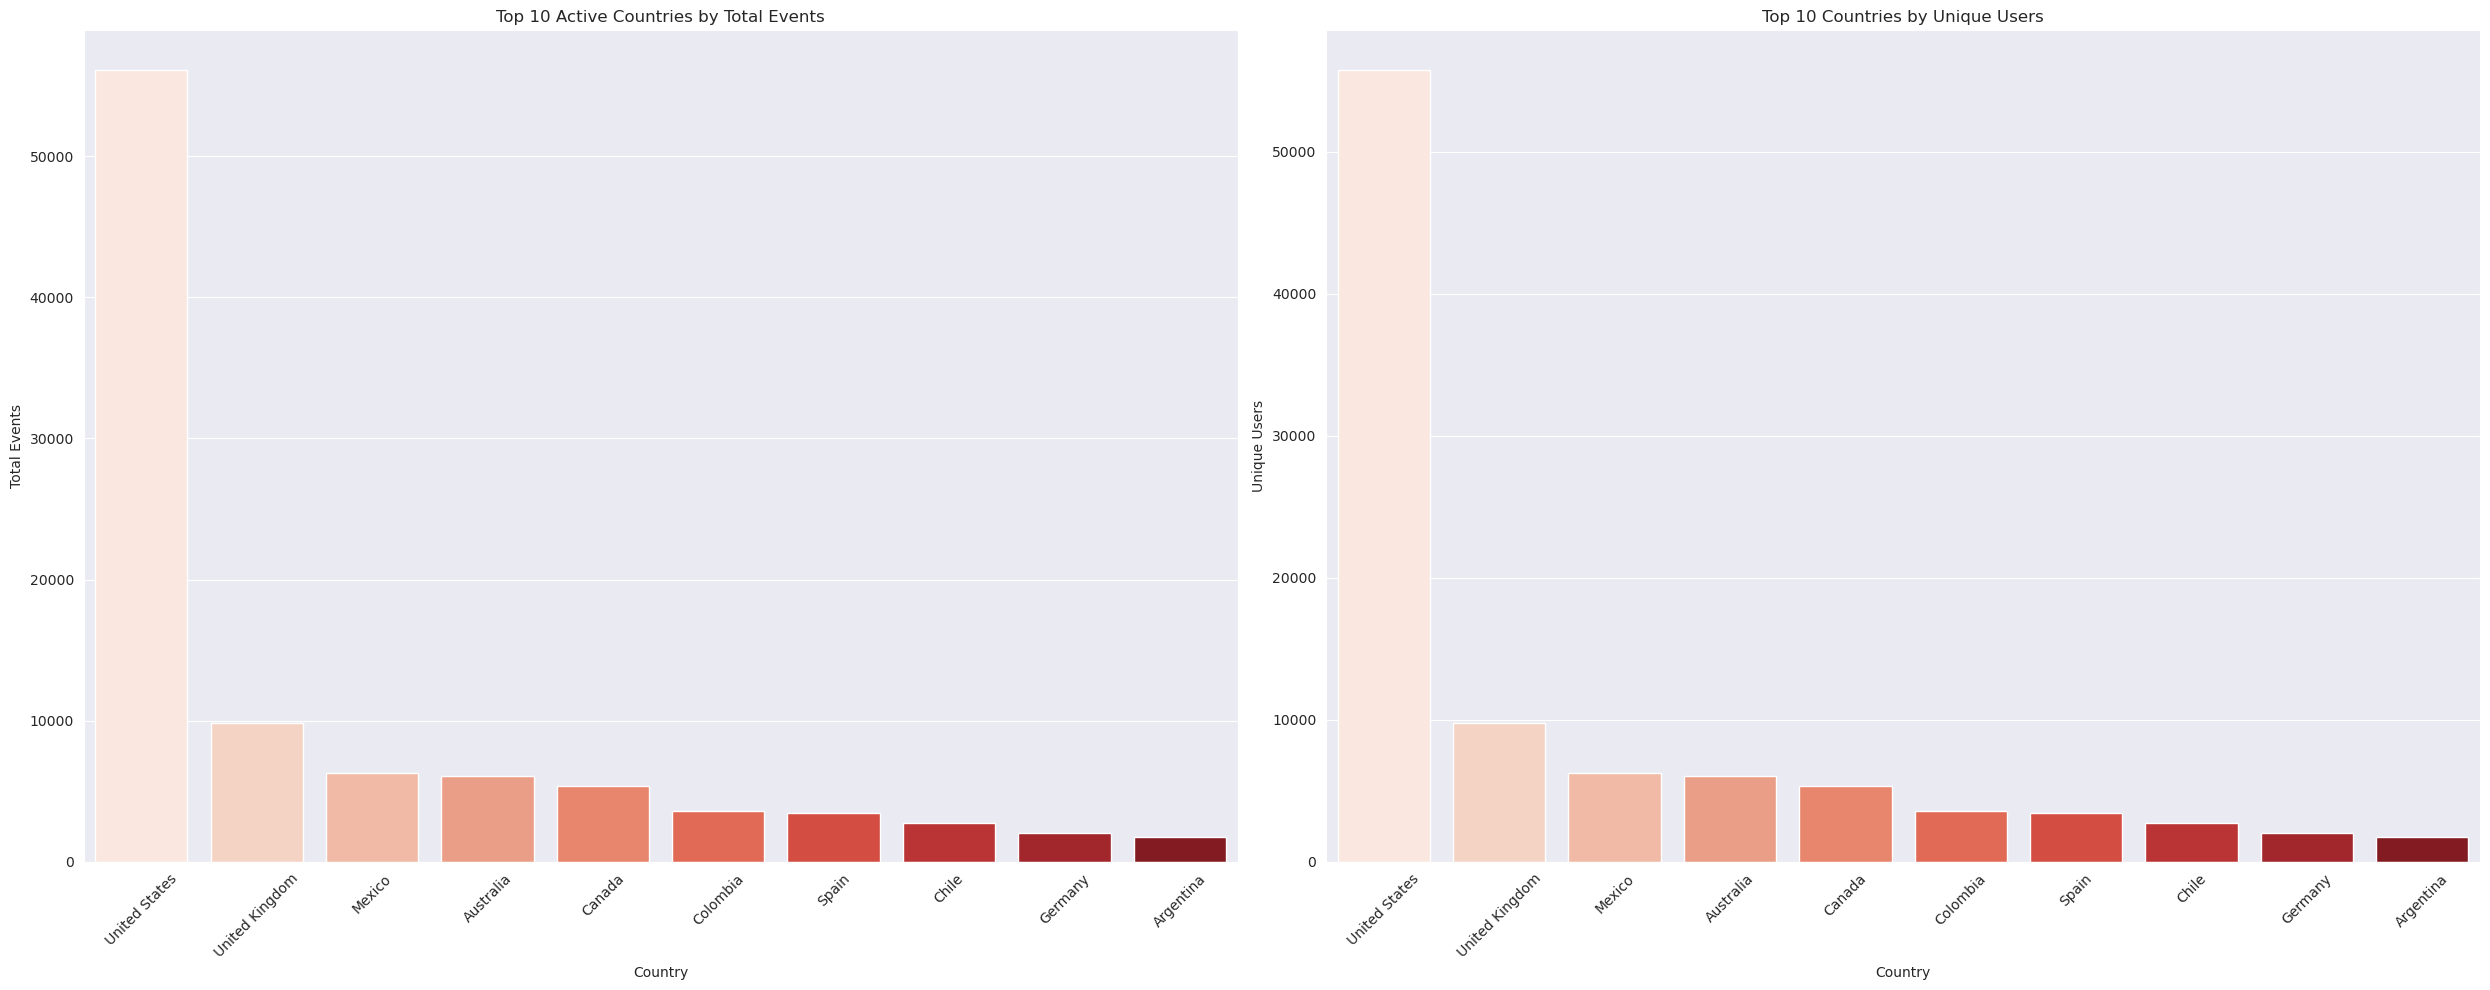

In [68]:
plot_country_activity(df_cleaned)
plot_country_activity(users_without_age_changes)

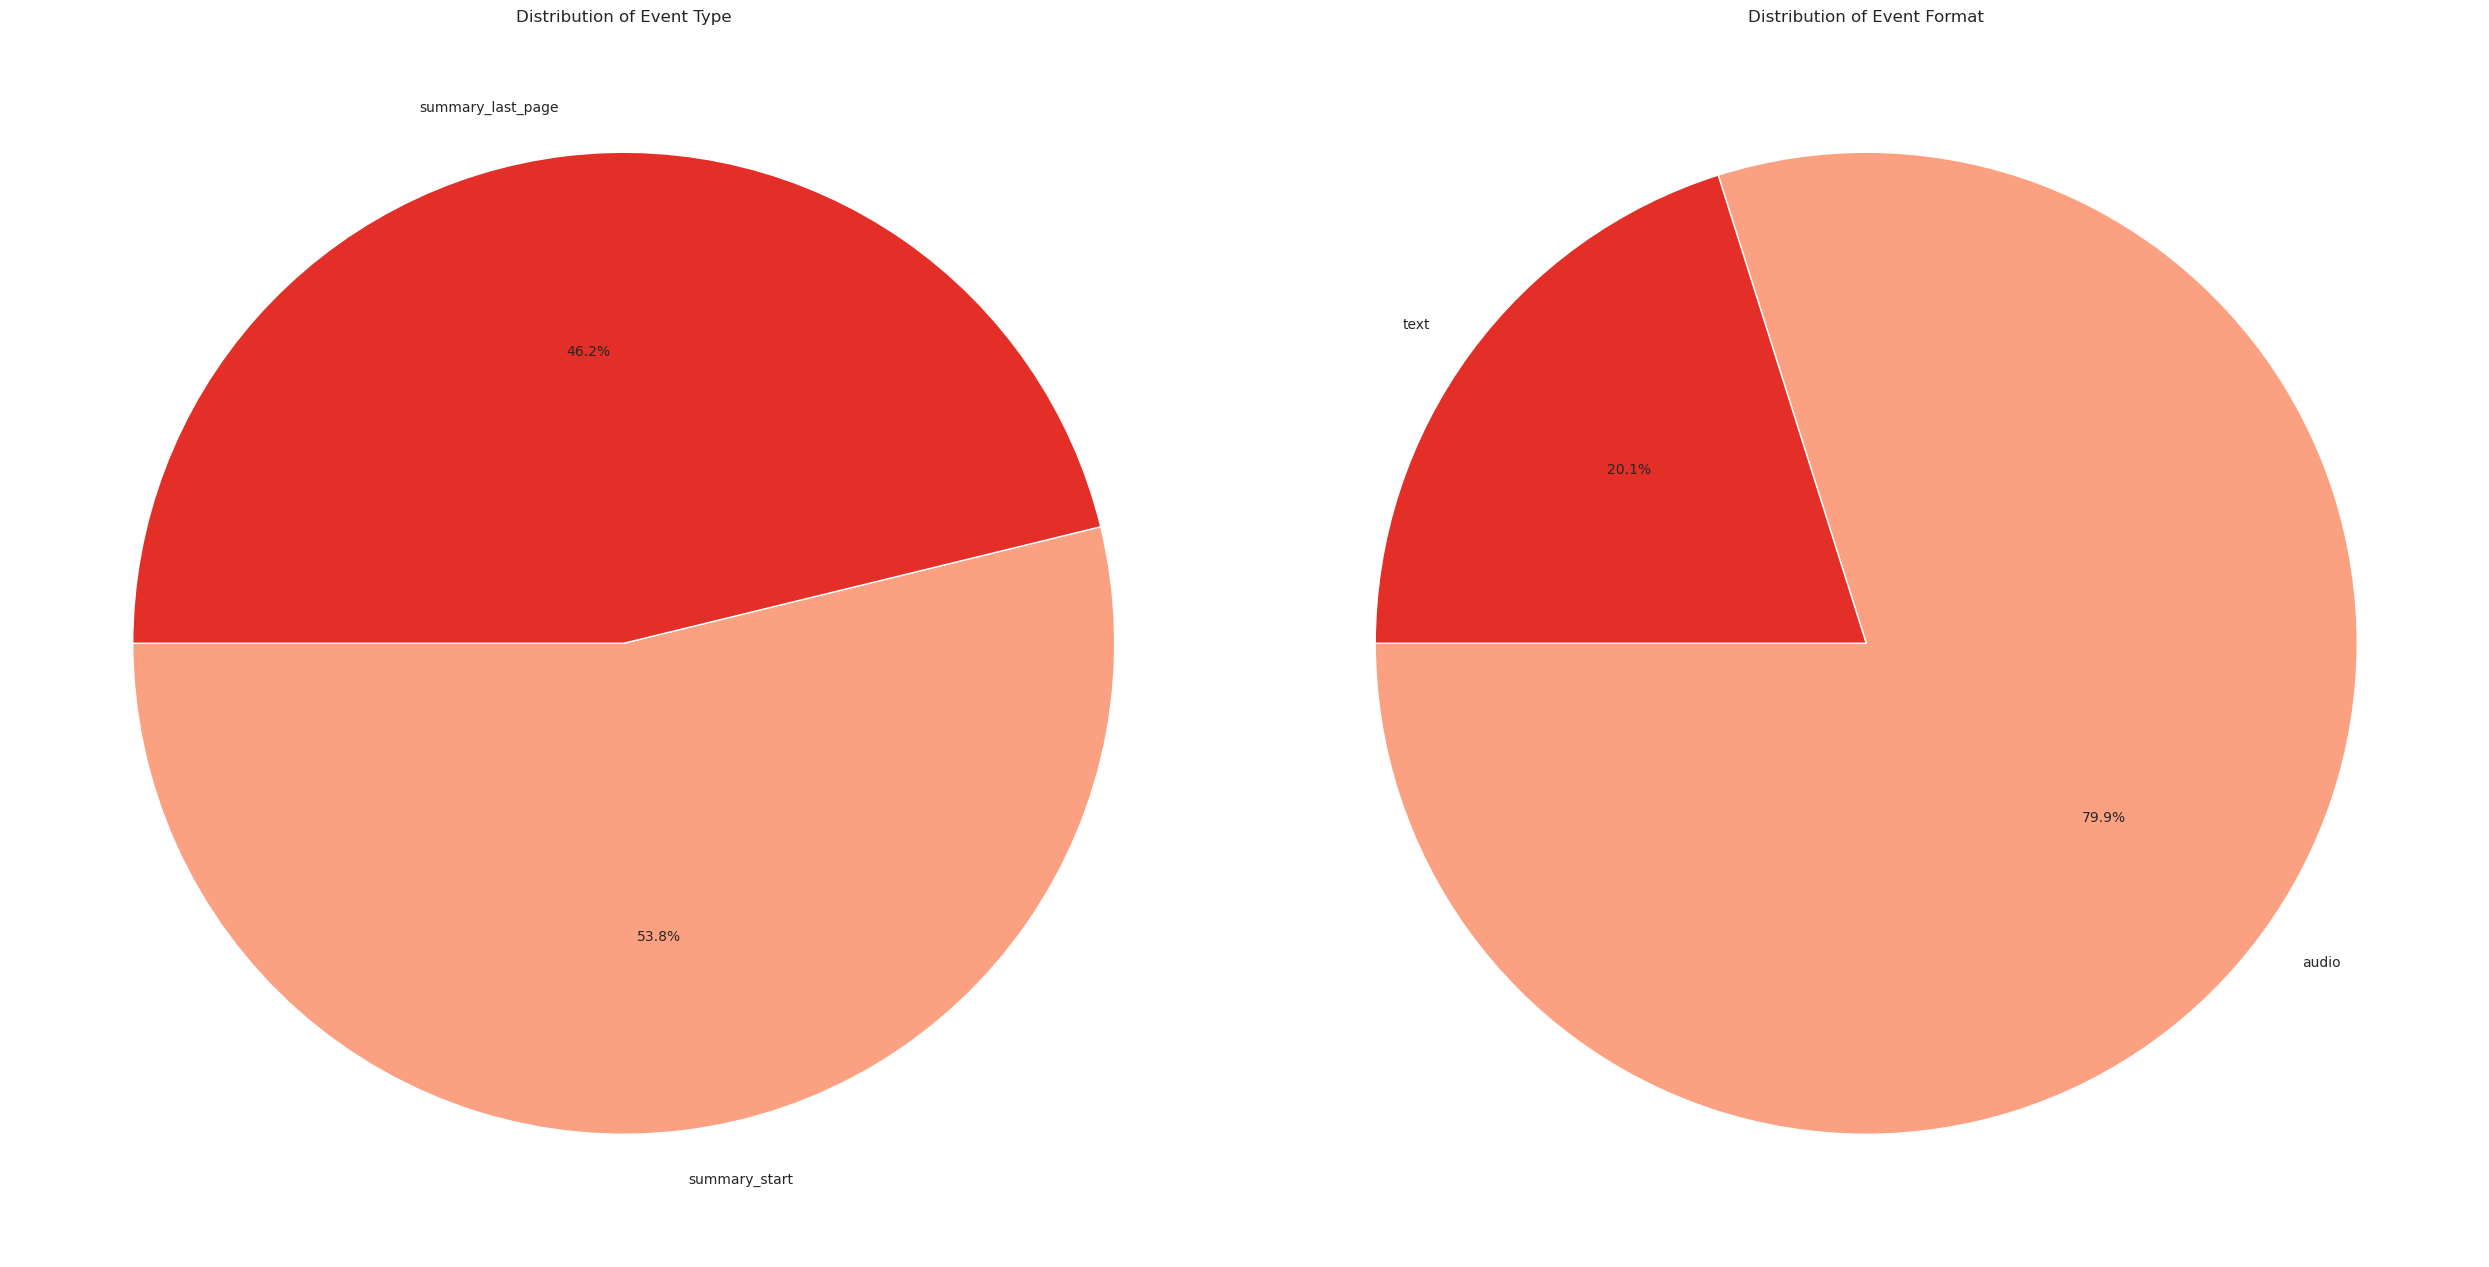

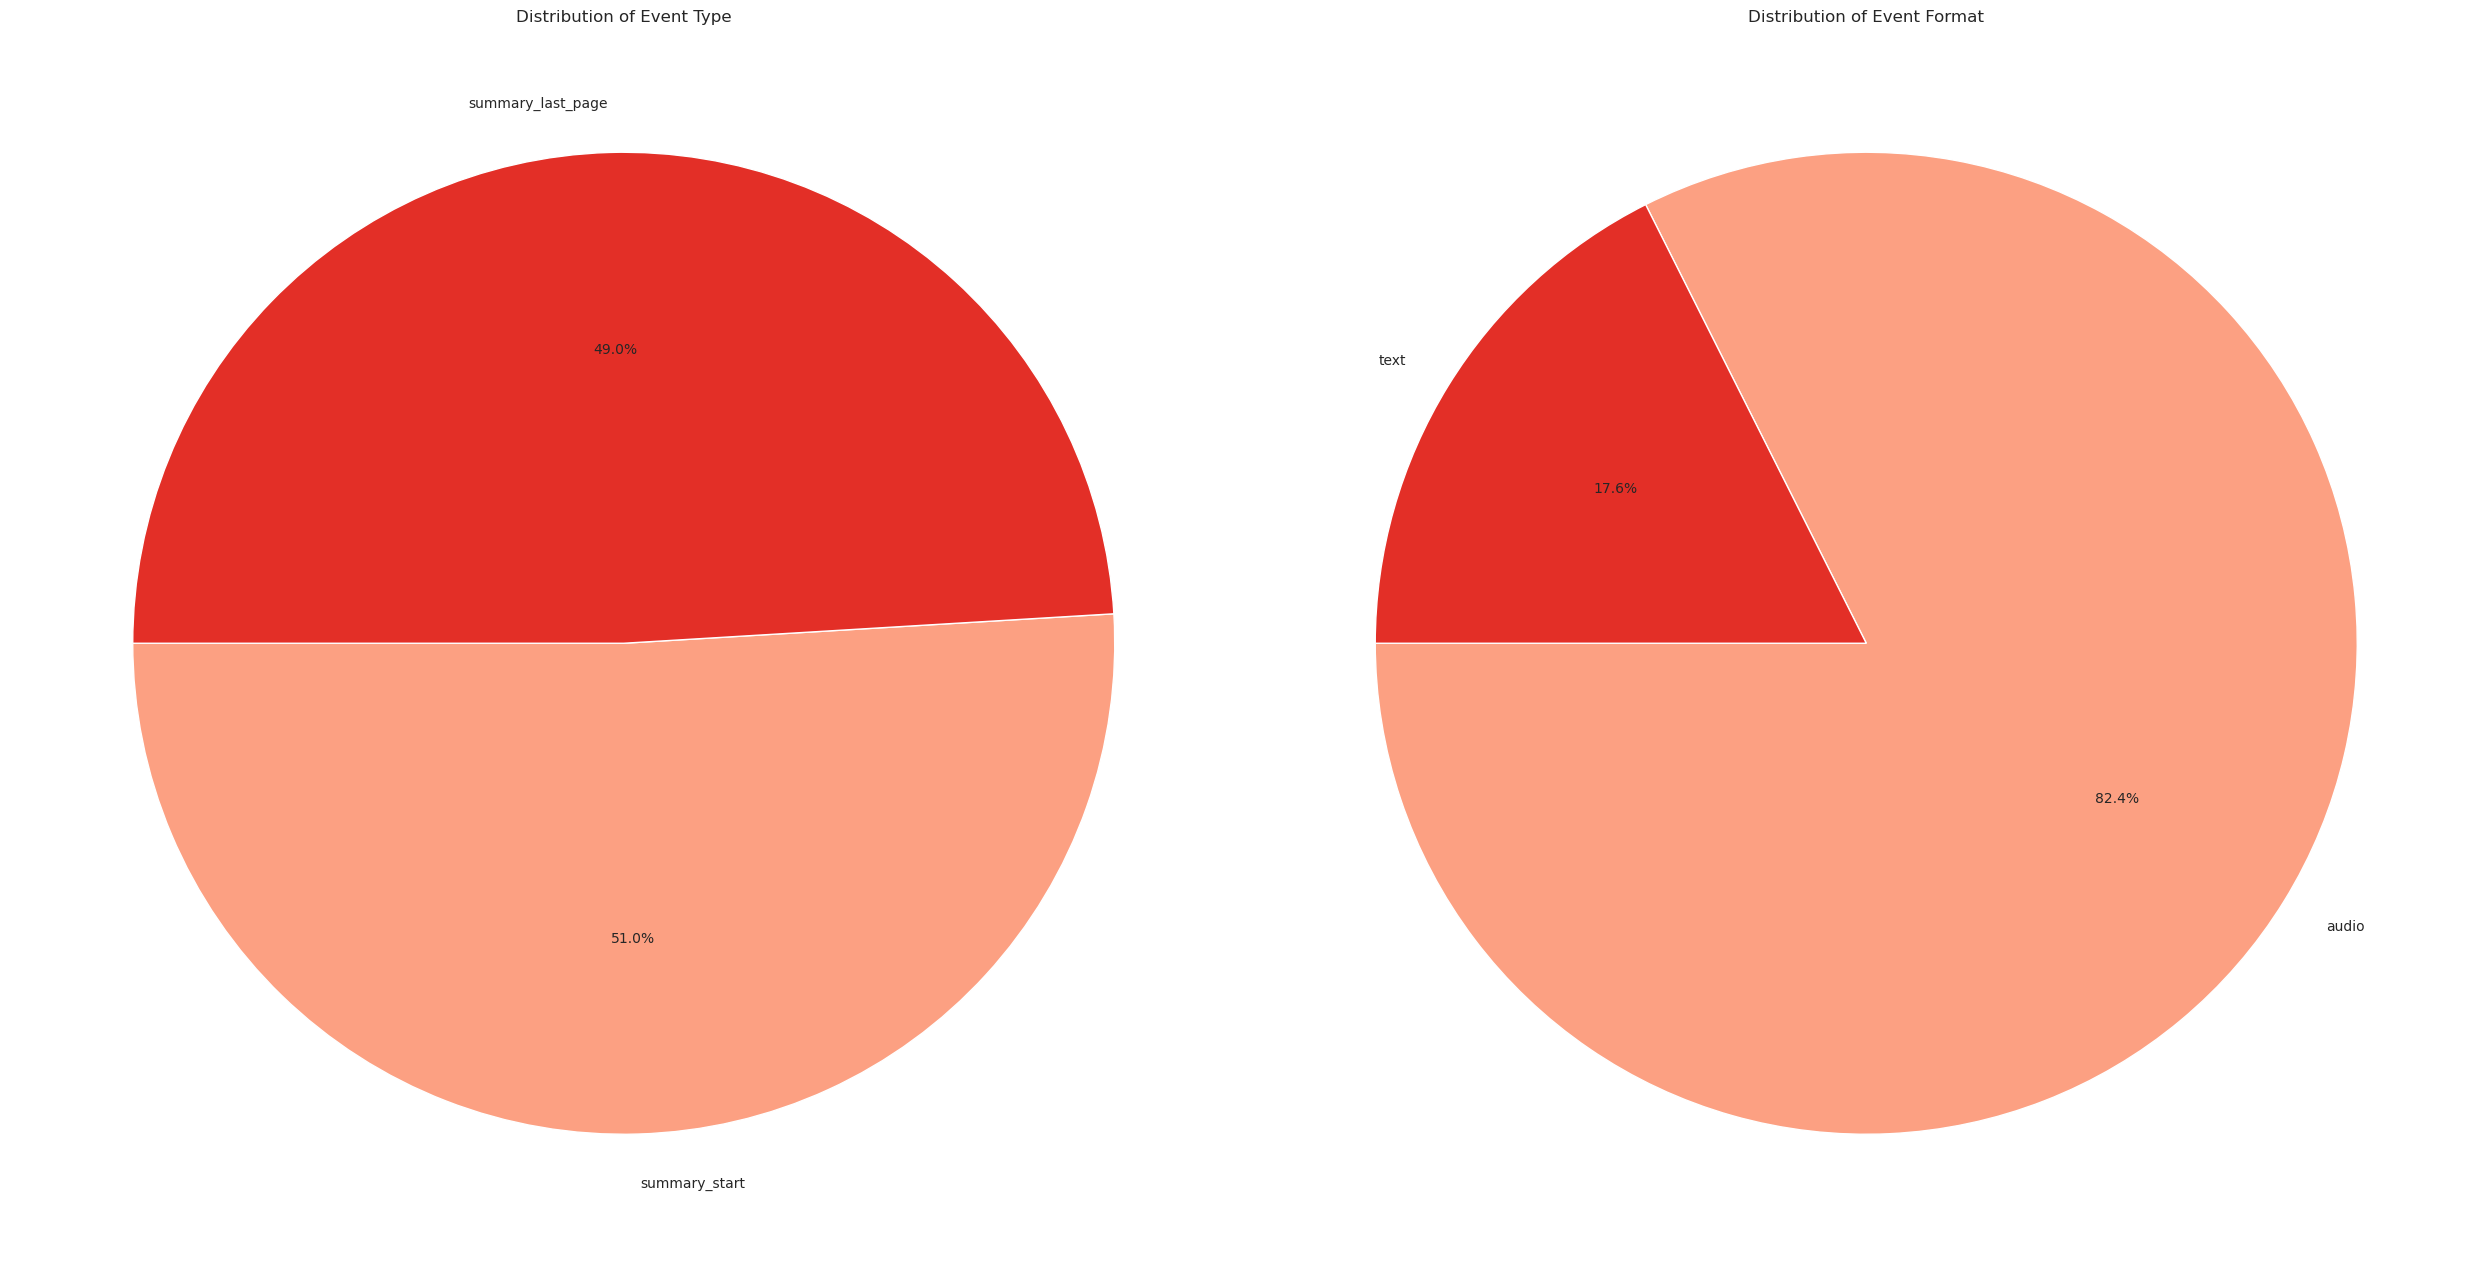

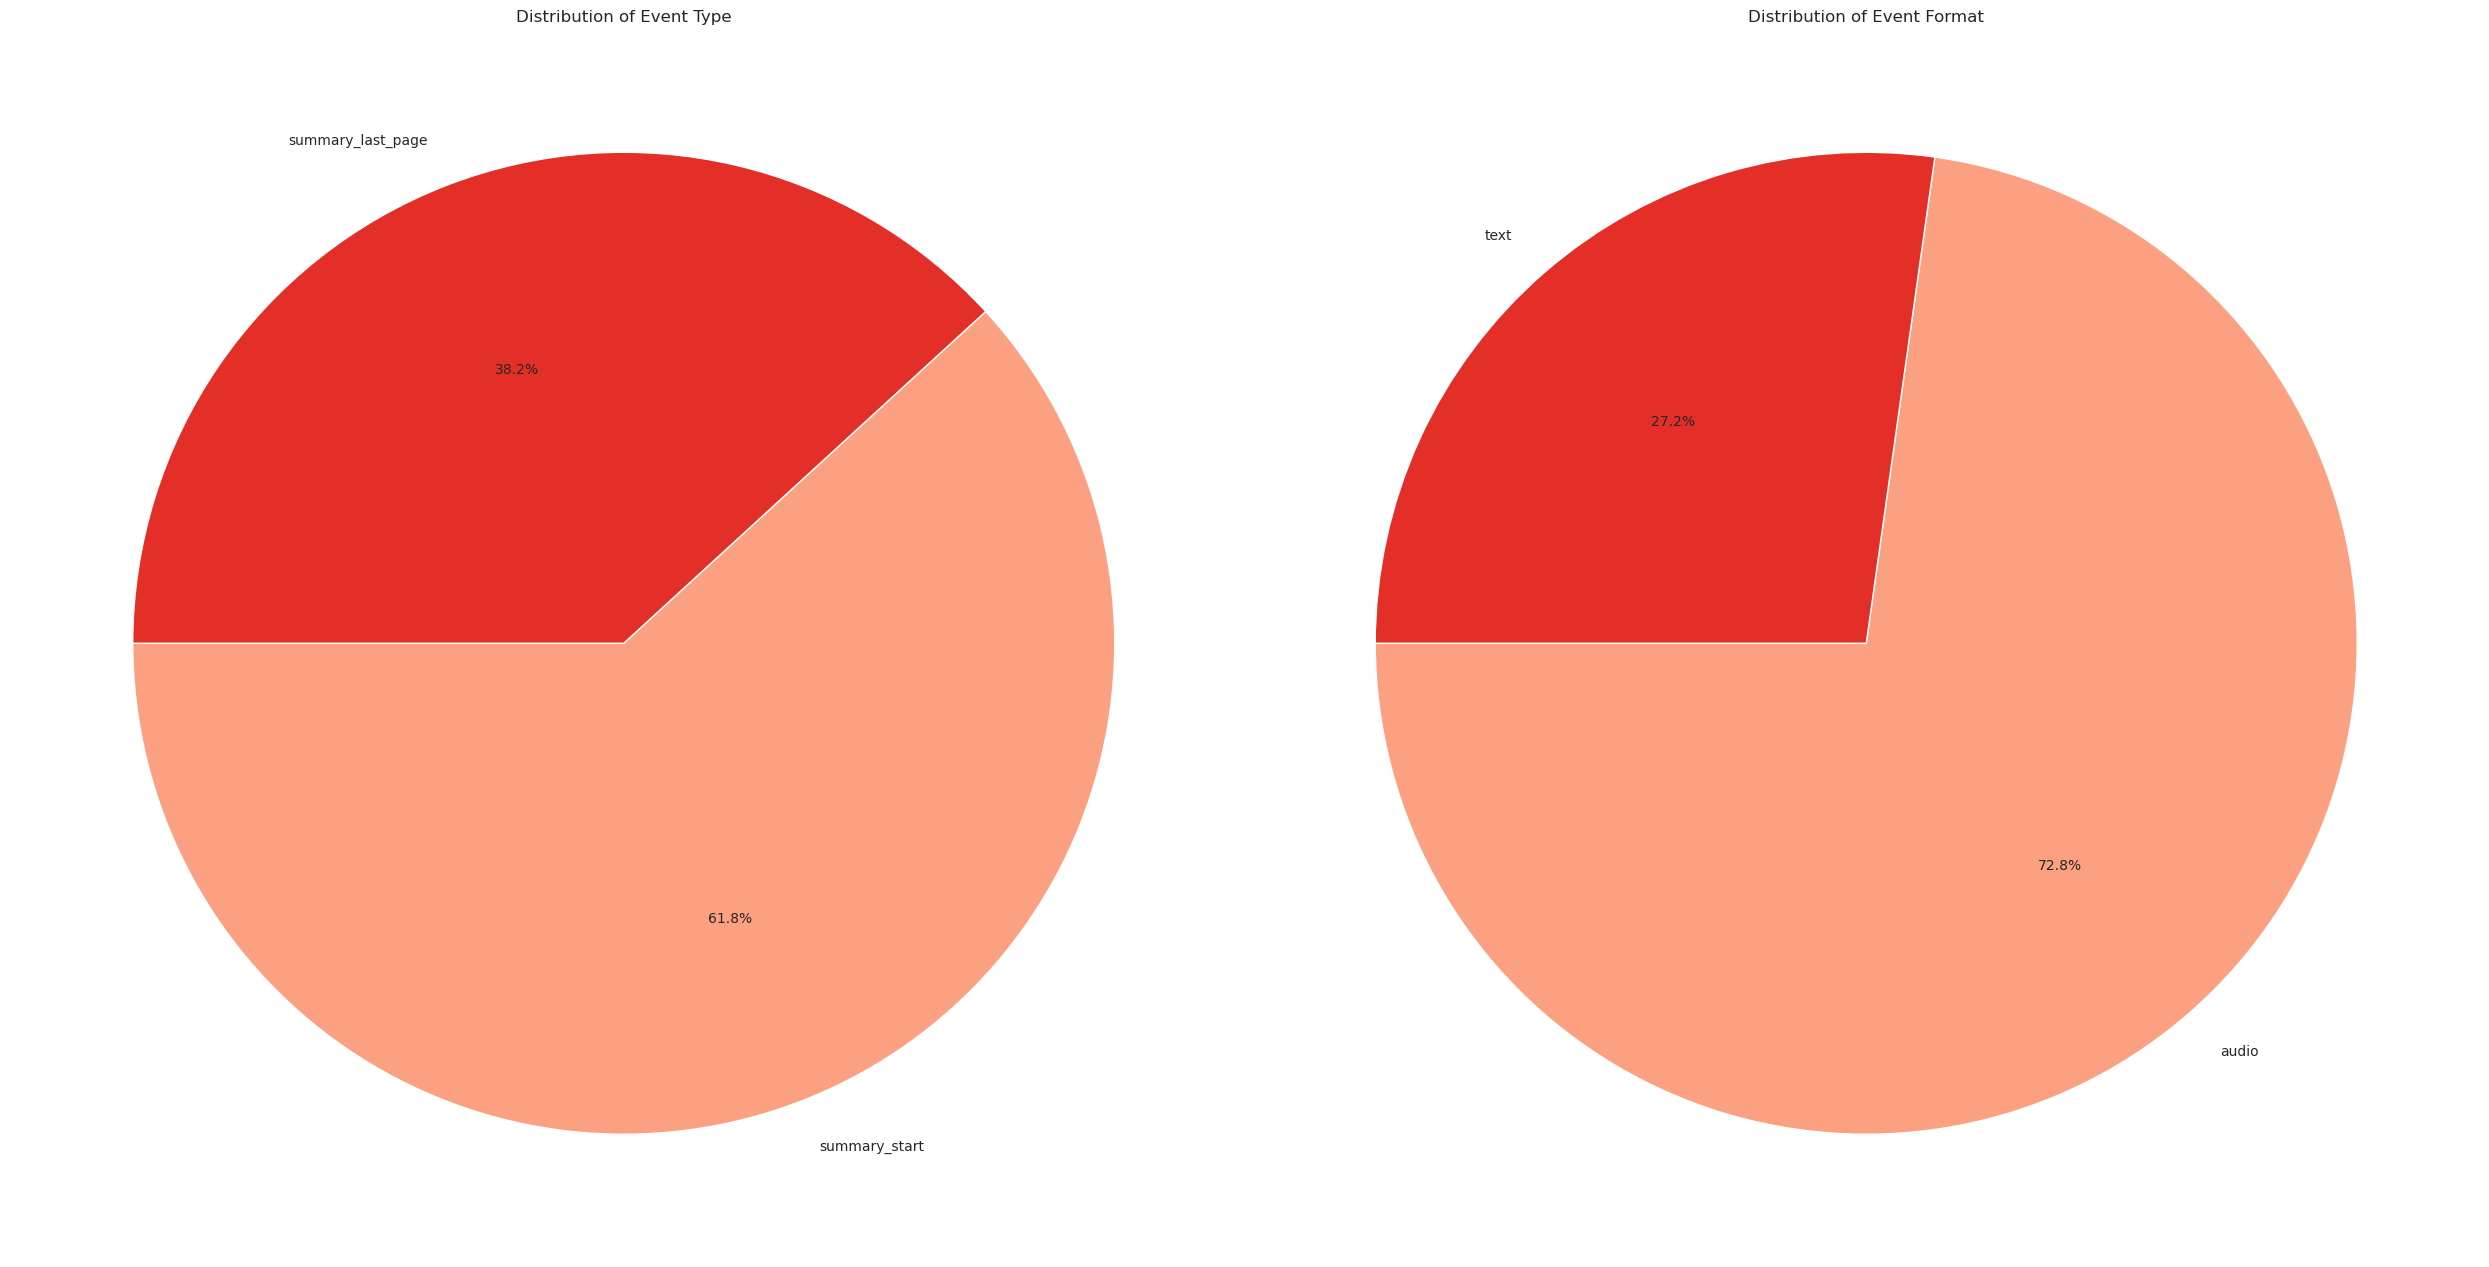

In [69]:
plot_event_distributions(df_cleaned)
plot_event_distributions(users_with_age_changes)
plot_event_distributions(users_without_age_changes)


In [70]:
print(f"Загальна кількість користувачів: {df_copy['user_id'].nunique()}")
print(f"Кількість користувачів, які змінювали вік: {len(users_with_changes_ids)}")
print(f"Кількість користувачів, які НЕ змінювали вік: {df_copy[~df_copy['user_id'].isin(users_with_changes_ids)]['user_id'].nunique()}")


Загальна кількість користувачів: 221655
Кількість користувачів, які змінювали вік: 93582
Кількість користувачів, які НЕ змінювали вік: 128073


In [71]:
df_check = df_copy[df_copy["user_id"].isin(users_with_changes_ids)]
print(df_check.groupby("user_id")["user_properties_age"].nunique().value_counts())


user_properties_age
2     43306
3     19673
4     10386
5      6285
6      3930
7      2649
8      1839
9      1394
10      997
11      782
12      601
13      416
14      314
15      241
16      163
17      126
18      112
19       85
21       58
20       56
22       33
23       25
24       22
26       20
25       17
31        8
30        7
27        7
28        6
29        5
33        5
38        3
35        3
32        2
43        2
44        2
42        1
34        1
Name: count, dtype: int64


In [72]:
df_check = df_copy[df_copy["user_id"].isin(users_with_changes_ids)]
df_check = df_check.sort_values(["user_id", "event_time"])
df_check[["user_id", "event_time", "user_properties_age"]]


,user_id,event_time,user_properties_age
104510,000EASFZ,2024-04-11 23:08:29,28.0
268774,000EASFZ,2024-04-20 19:27:49,54.0
38908,000EASFZ,2024-05-06 04:21:53,25.0
2411,000EASFZ,2024-05-15 10:35:30,31.0
318919,000EASFZ,2024-05-20 08:51:16,58.0
...,...,...,...
311316,ZZYEFUOG,2024-06-25 00:50:34,53.0
195877,ZZZ128XJ,2024-04-25 14:36:55,34.0
380102,ZZZ128XJ,2024-04-25 18:04:34,36.0
153984,ZZZ128XJ,2024-06-05 17:53:43,54.0


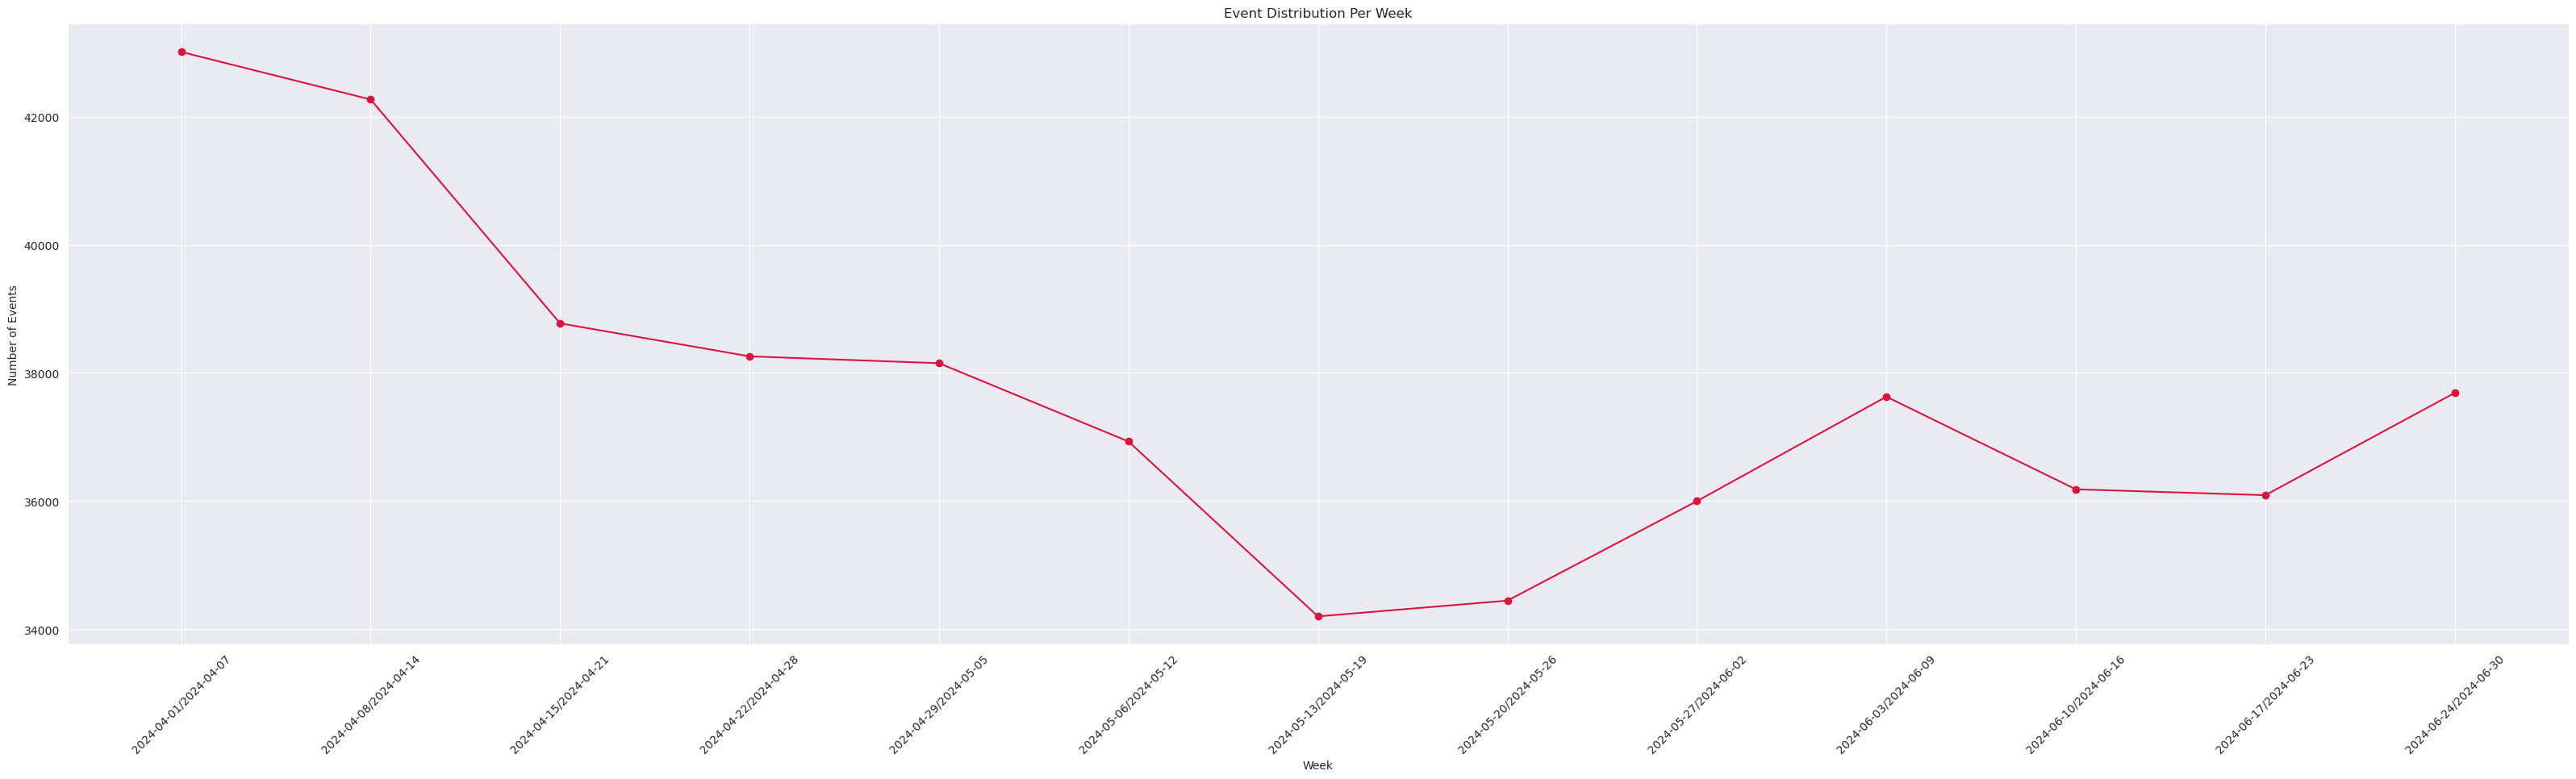

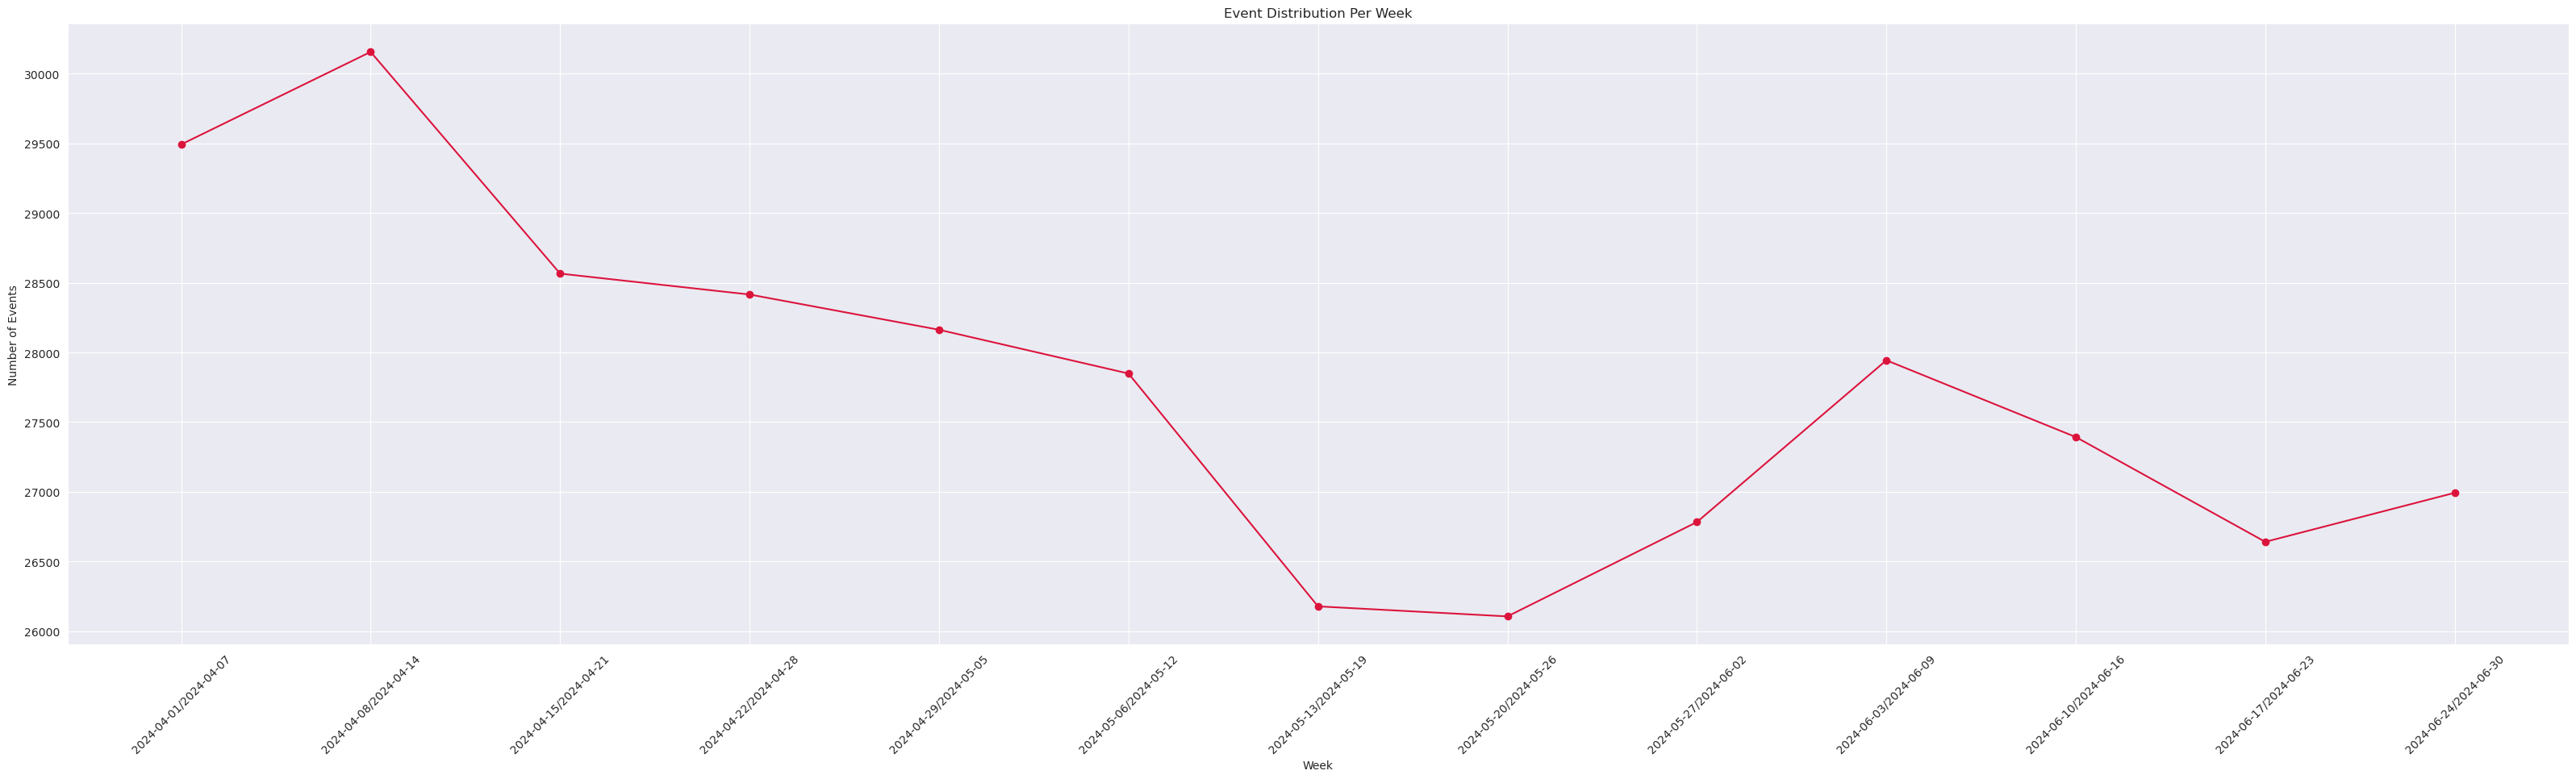

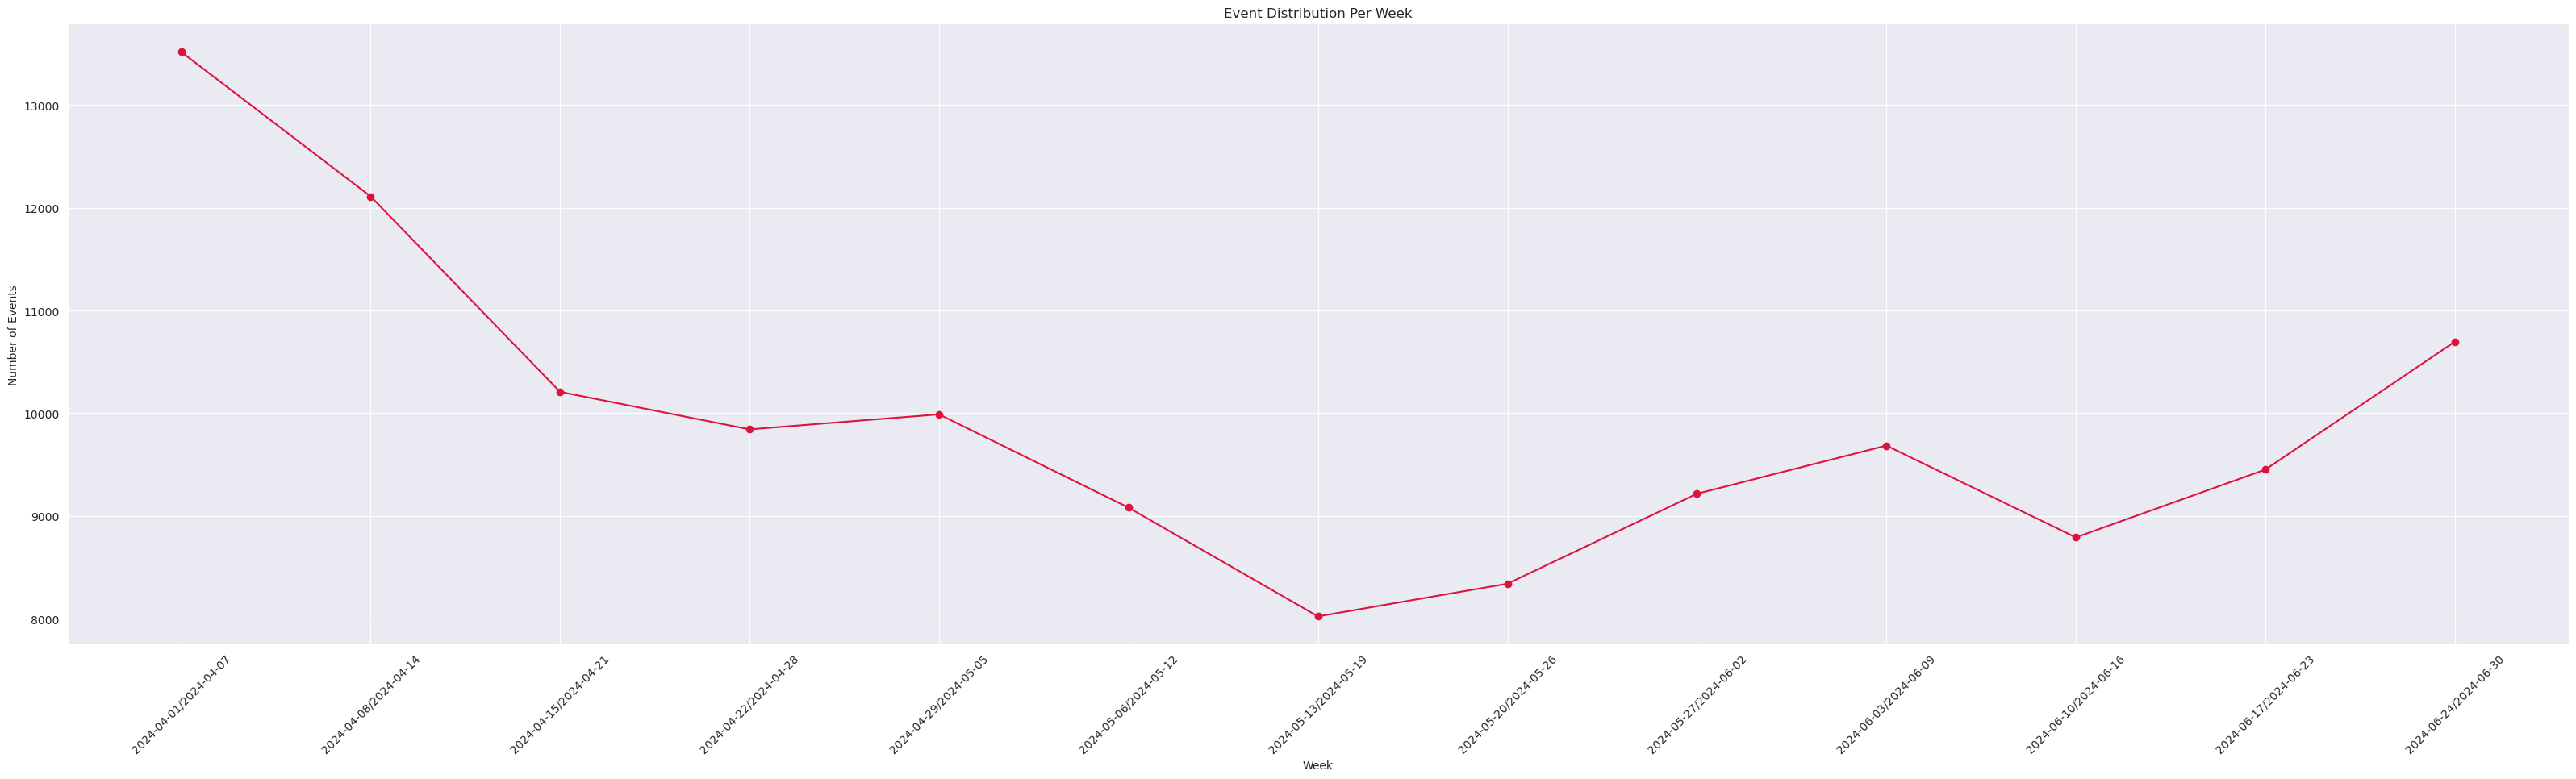

In [73]:
event_per_week(df_cleaned)
event_per_week(users_with_age_changes)
event_per_week(users_without_age_changes)